<a href="https://colab.research.google.com/github/AllysonAbreu/dw_contas_publicas_2022/blob/master/dea_receitas_dados_novos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports e instalações

In [318]:
# instalações das bibliotecas
!pip install basedosdados

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
import basedosdados as bd
from google.colab import auth
from google.cloud import bigquery

# Imports dos dados

## Login no gcloud

In [320]:
auth.authenticate_user()

project = 'dados-ibge-384913'
location = 'US'
client = bigquery.Client(project=project, location=location)

## Querys para buscar no firebase

In [321]:
query_populacao = "SELECT db.ano, db.populacao FROM `basedosdados.br_ibge_populacao.municipio` as db WHERE db.id_municipio = '2503704'"
query_pib_1999_2012 = "SELECT * FROM `basedosdados.br_ibge_pib.municipio_antigo` as db WHERE db.id_municipio = '2503704'"
query_pib_2002_2020 = "SELECT * FROM `basedosdados.br_ibge_pib.municipio` as db WHERE db.id_municipio = '2503704'"

## Import dos dados do IBGE

### Dados sobre a população

In [322]:
# Para carregar os dados do firebase direto no pandas
df_ibge_populacao = client.query(query_populacao).to_dataframe()

### Dados sobre o pib

<p>id_municipio	STRINGID Município - IBGE 7 Dígitos</p>
<p>ano	INTEGER	Ano</p>
<p>pib	INTEGER	Produto Interno Bruto</p>
<p>impostos_liquidos	INTEGER Impostos, líquidos de subsídios, sobre produtos</p>
<p>va	INTEGER	Valor adicionado bruto</p>
<p>va_agropecuaria	INTEGER Valor adicionado bruto da agropecuária</p>
<p>va_industria	INTEGER	Valor adicionado bruto da indústria</p>
<p>va_servicos	INTEGER Valor adicionado bruto dos serviços, exclusive administração, defesa, educação e saúde públicas e seguridade social</p>
<p>va_adespss	INTEGER	Valor adicionado bruto da administração, defesa, educação e saúde públicas e seguridade social</p>



In [323]:
# Para carregar os dados do firebase direto no pandas
df_ibge_pib_1999_2012 = client.query(query_pib_1999_2012).to_dataframe()
df_ibge_pib_1999_2012

,id_municipio,ano,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2503704,1999,137678000,18381000,119298000,4042000,15236000,100020000,31895000
1,2503704,2000,147505000,21854000,125651000,4036000,16710000,104905000,32198000
2,2503704,2001,161616000,23191000,138425000,2874000,19319000,116231000,44545000
3,2503704,2002,163999000,21171000,142828000,5694000,21845000,115289000,45919000
4,2503704,2003,203900000,30241000,173660000,5825000,22009000,145825000,54264000
5,2503704,2004,224386000,28835000,195551000,4750000,27958000,162843000,60249000
6,2503704,2005,227714000,25497000,202217000,3822000,30614000,167780000,68967000
7,2503704,2006,300007000,36316000,263692000,5136000,40493000,218063000,79946000
8,2503704,2007,369493000,45672000,323821000,4404000,50824000,268593000,89118000
9,2503704,2008,399841000,48576000,351265000,5645000,52290000,293330000,101182000


In [324]:
# Para carregar os dados do firebase direto no pandas
df_ibge_pib_2002_2020 = client.query(query_pib_2002_2020).to_dataframe()
df_ibge_pib_2002_2020

,id_municipio,ano,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2503704,2002,177049275,2897748,148071794,6171138,15082778,75397206,51420672
1,2503704,2003,224786728,35319092,189467636,6403772,16323628,105151942,61588293
2,2503704,2004,251046627,33342224,217704403,5921732,22212434,122077465,67492773
3,2503704,2005,271853716,34917409,236936307,5411566,22964689,131282173,7727788
4,2503704,2006,342557444,4535936,297198084,6570423,25876534,173747873,91003255
5,2503704,2007,405481057,52878472,352602584,5833151,35700733,210833472,100235228
6,2503704,2008,449803882,57799257,392004625,7172882,33662815,234358517,11681041
7,2503704,2009,484350702,64634475,419716226,8243712,37063349,253310493,121098672
8,2503704,2010,545321165,71900364,4734208,7449096,64137889,250045077,151788739
9,2503704,2011,614599514,83189966,531409549,12218575,71341656,282325974,165523343


In [325]:
# Merge com indicador
df_ibge_pib = pd.merge(df_ibge_pib_1999_2012.head(3), df_ibge_pib_2002_2020, how='outer', indicator=True)

# Remover a coluna indicadora
df_ibge_pib = df_ibge_pib.drop(columns=['_merge'])

df_ibge_pib


,id_municipio,ano,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2503704,1999,137678000,18381000,119298000,4042000,15236000,100020000,31895000
1,2503704,2000,147505000,21854000,125651000,4036000,16710000,104905000,32198000
2,2503704,2001,161616000,23191000,138425000,2874000,19319000,116231000,44545000
3,2503704,2002,177049275,2897748,148071794,6171138,15082778,75397206,51420672
4,2503704,2003,224786728,35319092,189467636,6403772,16323628,105151942,61588293
5,2503704,2004,251046627,33342224,217704403,5921732,22212434,122077465,67492773
6,2503704,2005,271853716,34917409,236936307,5411566,22964689,131282173,7727788
7,2503704,2006,342557444,4535936,297198084,6570423,25876534,173747873,91003255
8,2503704,2007,405481057,52878472,352602584,5833151,35700733,210833472,100235228
9,2503704,2008,449803882,57799257,392004625,7172882,33662815,234358517,11681041


## Import dos dados em .csv

In [326]:
df_receitas = pd.read_csv('dados_receitas.csv', sep=';')
df_receitas.head(1)

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS
0,1722010101,2013-01-03,886cd0eabf5a18,185560.68,prefeitura municipal


## Conversões nos dados

### Conversão e tratamento dos dados nas colunas do DF df_ibge_pib

In [327]:
# dados antes da conversão
df_ibge_pib.dtypes

id_municipio         object
ano                   int64
pib                   int64
impostos_liquidos     int64
va                    int64
va_agropecuaria       int64
va_industria          int64
va_servicos           int64
va_adespss            int64
dtype: object

In [328]:
# Definindo a função para modificar os valores das células
def modify_cells(x):
    try:
        x = str(x)
        x += "00"
        return float(x[:-2] + '.' + x[-2:])
    except ValueError:
        return x


In [329]:
# dados das colunas numéricas inteiras após a conversão
list_columns_pib = ['pib', 'impostos_liquidos', 'va', 'va_agropecuaria', 'va_industria', 'va_servicos', 'va_adespss']

# Aplicando a função em todas as células do DataFrame
df_ibge_pib[list_columns_pib] = df_ibge_pib[list_columns_pib].applymap(modify_cells)

# Verificando o tipo de dados do DataFrame após a modificação
df_ibge_pib.dtypes

id_municipio          object
ano                    int64
pib                  float64
impostos_liquidos    float64
va                   float64
va_agropecuaria      float64
va_industria         float64
va_servicos          float64
va_adespss           float64
dtype: object

In [330]:
# corrigindo o valor do PIB de 2020
dic_column_correct = {'id_municipio':'2503704',
                      'ano':2020,
                      'pib':1055820.97,
                      'impostos_liquidos':149580.22,
                      'va':984890.38,
                      'va_agropecuaria':16844.65,
                      'va_industria':98240.13,
                      'va_servicos':567634.70,
                      'va_adespss':302170.90}

# alterando dados da última linha para os mais atualizados segundo o ibge
df_ibge_pib.loc[21] = dic_column_correct

# Multiplicando por 10 os valores da coluna "pib" nas linhas 17 e 18
df_ibge_pib.loc[17:18, "pib"] *= 10

df_ibge_pib

,id_municipio,ano,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2503704,1999,137678000.00,18381000.00,119298000.00,4042000.00,15236000.00,100020000.00,31895000.00
1,2503704,2000,147505000.00,21854000.00,125651000.00,4036000.00,16710000.00,104905000.00,32198000.00
2,2503704,2001,161616000.00,23191000.00,138425000.00,2874000.00,19319000.00,116231000.00,44545000.00
3,2503704,2002,177049275.00,2897748.00,148071794.00,6171138.00,15082778.00,75397206.00,51420672.00
4,2503704,2003,224786728.00,35319092.00,189467636.00,6403772.00,16323628.00,105151942.00,61588293.00
5,2503704,2004,251046627.00,33342224.00,217704403.00,5921732.00,22212434.00,122077465.00,67492773.00
6,2503704,2005,271853716.00,34917409.00,236936307.00,5411566.00,22964689.00,131282173.00,7727788.00
7,2503704,2006,342557444.00,4535936.00,297198084.00,6570423.00,25876534.00,173747873.00,91003255.00
8,2503704,2007,405481057.00,52878472.00,352602584.00,5833151.00,35700733.00,210833472.00,100235228.00
9,2503704,2008,449803882.00,57799257.00,392004625.00,7172882.00,33662815.00,234358517.00,11681041.00


In [331]:
# dados da coluna ano após a conversão
df_ibge_pib['ano'] = pd.to_datetime(df_ibge_pib['ano'], format='%Y')
df_ibge_pib.dtypes

id_municipio                 object
ano                  datetime64[ns]
pib                         float64
impostos_liquidos           float64
va                          float64
va_agropecuaria             float64
va_industria                float64
va_servicos                 float64
va_adespss                  float64
dtype: object

### Conversão e tratamento dos dados da coluna tempo do DF dados_receitas

In [332]:
# dados antes da conversão
df_receitas.dtypes

COD_RECEITA           int64
DATA                 object
COD_CONTRIBUINTE     object
VALOR_ARRECADADO    float64
FONTE_DADOS          object
dtype: object

In [333]:
# dados após a conversão
df_receitas['DATA'] = pd.to_datetime(df_receitas['DATA'])
df_receitas.dtypes

COD_RECEITA                  int64
DATA                datetime64[ns]
COD_CONTRIBUINTE            object
VALOR_ARRECADADO           float64
FONTE_DADOS                 object
dtype: object

### Conversão na coluna ano do DF df_ibge_populacao

In [334]:
# dados originais
df_ibge_populacao.dtypes

ano          int64
populacao    int64
dtype: object

In [335]:
# dados apos conversao para dt
df_ibge_populacao['ano'] = pd.to_datetime(df_ibge_populacao['ano'], format='%Y')
df_ibge_populacao

,ano,populacao
0,1991-01-01,51273
1,1992-01-01,51530
2,1993-01-01,51965
3,1994-01-01,52279
4,1995-01-01,52586
5,1996-01-01,51396
6,1997-01-01,51575
7,1998-01-01,51726
8,1999-01-01,51878
9,2000-01-01,54715


In [336]:
# dados apos a conversao
df_ibge_populacao.dtypes

ano          datetime64[ns]
populacao             int64
dtype: object

# Análises

## Séries históricas

### Time series da população cajazeirense entre 1991 e 2021

In [337]:
df_ibge_populacao_index_ano = df_ibge_populacao.set_index('ano')

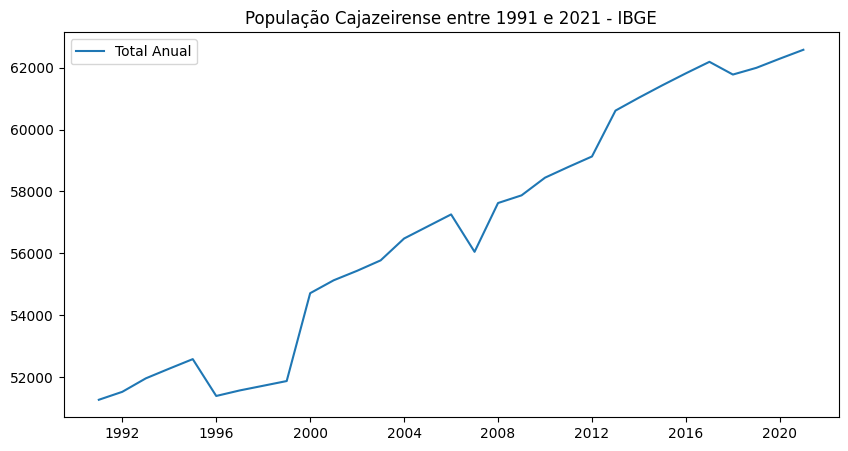

In [338]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_ibge_populacao_index_ano.index, df_ibge_populacao_index_ano['populacao'], label='Total Anual')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('População Cajazeirense entre 1991 e 2021 - IBGE')

# Exibe o gráfico
plt.show()

In [339]:
df_ibge_populacao_index_ano['variacao_anual'] = df_ibge_populacao_index_ano['populacao'].diff()
df_ibge_populacao_index_ano['porcentagem_variacao_anual_%'] = ((df_ibge_populacao_index_ano['variacao_anual'] / df_ibge_populacao_index_ano['populacao'].shift(1)) * 100).round(2)
df_ibge_populacao_index_ano['aceleracao_variacao_anual'] = df_ibge_populacao_index_ano['variacao_anual'].diff()
df_ibge_populacao_index_ano['porcentagem_aceleracao_variacao_anual_%'] = ((df_ibge_populacao_index_ano['aceleracao_variacao_anual'] / df_ibge_populacao_index_ano['variacao_anual'].shift(1)) * 100).round(2)
df_ibge_populacao_index_ano

,populacao,variacao_anual,porcentagem_variacao_anual_%,aceleracao_variacao_anual,porcentagem_aceleracao_variacao_anual_%
ano,,,,,
1991-01-01,51273,NaN,NaN,NaN,NaN
1992-01-01,51530,257.00,0.50,NaN,NaN
1993-01-01,51965,435.00,0.84,178.00,69.26
1994-01-01,52279,314.00,0.60,-121.00,-27.82
1995-01-01,52586,307.00,0.59,-7.00,-2.23
1996-01-01,51396,-1190.00,-2.26,-1497.00,-487.62
1997-01-01,51575,179.00,0.35,1369.00,-115.04
1998-01-01,51726,151.00,0.29,-28.00,-15.64
1999-01-01,51878,152.00,0.29,1.00,0.66


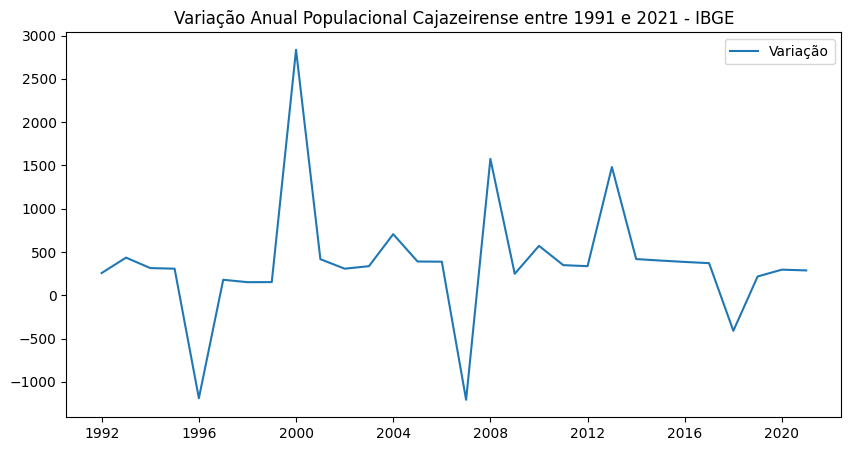

In [340]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_ibge_populacao_index_ano.index, df_ibge_populacao_index_ano['variacao_anual'], label='Variação')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação Anual Populacional Cajazeirense entre 1991 e 2021 - IBGE')

# Exibe o gráfico
plt.show()

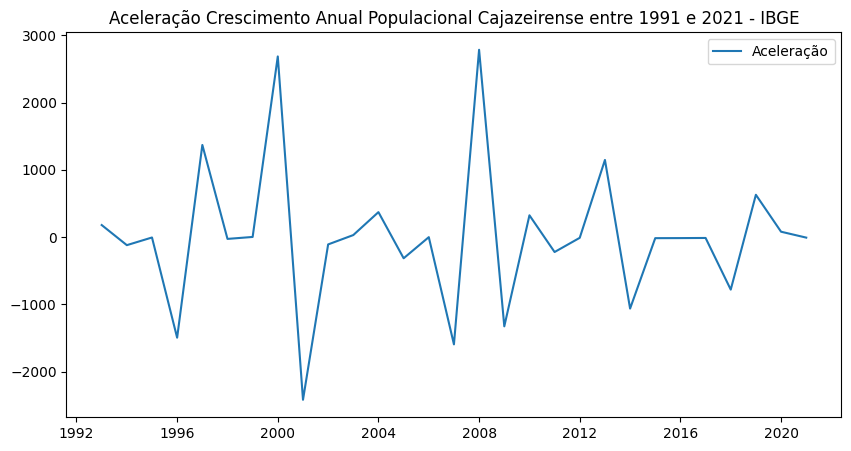

In [341]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_ibge_populacao_index_ano.index, df_ibge_populacao_index_ano['aceleracao_variacao_anual'], label='Aceleração')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração Crescimento Anual Populacional Cajazeirense entre 1991 e 2021 - IBGE')

# Exibe o gráfico
plt.show()

In [342]:
print(f"Total da variação populacional entre 1991 e 2021: {df_ibge_populacao_index_ano['variacao_anual'].sum()}")
print(f"Média móvel da variação anual: {(df_ibge_populacao_index_ano['variacao_anual'].sum()/df_ibge_populacao_index_ano.shape[0]).round(2)}")

Total da variação populacional entre 1991 e 2021: 11303.0
Média móvel da variação anual: 364.61


In [343]:
print(f"Total da aceleração da variação populacional entre 1991 e 2021: {df_ibge_populacao_index_ano['aceleracao_variacao_anual'].sum()}")
print(f"Média móvel anual da aceleração da variação populacional entre 1991 e 2021: {(df_ibge_populacao_index_ano['aceleracao_variacao_anual'].sum()/df_ibge_populacao_index_ano.shape[0]).round(2)}")

Total da aceleração da variação populacional entre 1991 e 2021: 30.0
Média móvel anual da aceleração da variação populacional entre 1991 e 2021: 0.97


In [344]:
print(f"Porcentagem da variação populacional entre 1991 e 2021: {df_ibge_populacao_index_ano['porcentagem_variacao_anual_%'].sum().round(2)}%")
print(f"Média percentual móvel anual da variação populacional entre 1991 e 2021: {(df_ibge_populacao_index_ano['porcentagem_variacao_anual_%'].sum()/df_ibge_populacao_index_ano.shape[0]).round(2)}%")

Porcentagem da variação populacional entre 1991 e 2021: 20.25%
Média percentual móvel anual da variação populacional entre 1991 e 2021: 0.65%


In [345]:
print(f"Porcentagem da aceleração da variação populacional entre 1991 e 2021: {df_ibge_populacao_index_ano['porcentagem_aceleracao_variacao_anual_%'].sum().round(2)}%")
print(f"Média percentual móvel anual da aceleração da variação populacional entre 1991 e 2021: {(df_ibge_populacao_index_ano['porcentagem_aceleracao_variacao_anual_%'].sum()/df_ibge_populacao_index_ano.shape[0]).round(2)}%")

Porcentagem da aceleração da variação populacional entre 1991 e 2021: 439.69%
Média percentual móvel anual da aceleração da variação populacional entre 1991 e 2021: 14.18%


### Time series do pib entre 1999 e 2020

In [346]:
# verificando se há valores nulos
df_ibge_pib.isna().value_counts()

id_municipio  ano    pib    impostos_liquidos  va     va_agropecuaria  va_industria  va_servicos  va_adespss
False         False  False  False              False  False            False         False        False         22
dtype: int64

In [347]:
# verificando o tipo das colunas
df_ibge_pib.dtypes

id_municipio                 object
ano                  datetime64[ns]
pib                         float64
impostos_liquidos           float64
va                          float64
va_agropecuaria             float64
va_industria                float64
va_servicos                 float64
va_adespss                  float64
dtype: object

In [348]:
# criando df para analises dos dados
df_valor_pib_analise = df_ibge_pib[['ano','pib', 'impostos_liquidos', 'va', 'va_agropecuaria', 'va_industria', 'va_servicos', 'va_adespss']]

df_valor_pib_analise.set_index('ano', inplace=True)
df_valor_pib_analise

,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
ano,,,,,,,
1999-01-01,137678000.00,18381000.00,119298000.00,4042000.00,15236000.00,100020000.00,31895000.00
2000-01-01,147505000.00,21854000.00,125651000.00,4036000.00,16710000.00,104905000.00,32198000.00
2001-01-01,161616000.00,23191000.00,138425000.00,2874000.00,19319000.00,116231000.00,44545000.00
2002-01-01,177049275.00,2897748.00,148071794.00,6171138.00,15082778.00,75397206.00,51420672.00
2003-01-01,224786728.00,35319092.00,189467636.00,6403772.00,16323628.00,105151942.00,61588293.00
2004-01-01,251046627.00,33342224.00,217704403.00,5921732.00,22212434.00,122077465.00,67492773.00
2005-01-01,271853716.00,34917409.00,236936307.00,5411566.00,22964689.00,131282173.00,7727788.00
2006-01-01,342557444.00,4535936.00,297198084.00,6570423.00,25876534.00,173747873.00,91003255.00
2007-01-01,405481057.00,52878472.00,352602584.00,5833151.00,35700733.00,210833472.00,100235228.00


#### PIB

In [349]:
df_pib_analise = df_valor_pib_analise.copy()
df_pib_analise.drop(columns=['impostos_liquidos','va','va_agropecuaria','va_industria','va_servicos','va_adespss'], inplace=True)

pd.options.display.float_format = '{:.2f}'.format
print(df_pib_analise)

                     pib
ano                     
1999-01-01  137678000.00
2000-01-01  147505000.00
2001-01-01  161616000.00
2002-01-01  177049275.00
2003-01-01  224786728.00
2004-01-01  251046627.00
2005-01-01  271853716.00
2006-01-01  342557444.00
2007-01-01  405481057.00
2008-01-01  449803882.00
2009-01-01  484350702.00
2010-01-01  545321165.00
2011-01-01  614599514.00
2012-01-01  688504211.00
2013-01-01  770339457.00
2014-01-01  904648155.00
2015-01-01  949025262.00
2016-01-01 1039264140.00
2017-01-01 1096132930.00
2018-01-01 1064231522.00
2019-01-01 1128058014.00
2020-01-01    1055820.97


In [350]:
# inferindo variação e acelaração anual do pib
df_pib_analise['variacao_anual'] = df_pib_analise['pib'].diff()
df_pib_analise['porcentagem_variacao_anual_%'] = ((df_pib_analise['variacao_anual'] / df_pib_analise['pib'].shift(1)) * 100).round(2)
df_pib_analise['aceleracao_variacao_anual'] = df_pib_analise['variacao_anual'].diff()
df_pib_analise['porcentagem_aceleracao_variacao_anual_%'] = ((df_pib_analise['aceleracao_variacao_anual'] / df_pib_analise['variacao_anual'].shift(1)) * 100).round(2)
df_pib_analise

,pib,variacao_anual,porcentagem_variacao_anual_%,aceleracao_variacao_anual,porcentagem_aceleracao_variacao_anual_%
ano,,,,,
1999-01-01,137678000.00,NaN,NaN,NaN,NaN
2000-01-01,147505000.00,9827000.00,7.14,NaN,NaN
2001-01-01,161616000.00,14111000.00,9.57,4284000.00,43.59
2002-01-01,177049275.00,15433275.00,9.55,1322275.00,9.37
2003-01-01,224786728.00,47737453.00,26.96,32304178.00,209.32
2004-01-01,251046627.00,26259899.00,11.68,-21477554.00,-44.99
2005-01-01,271853716.00,20807089.00,8.29,-5452810.00,-20.76
2006-01-01,342557444.00,70703728.00,26.01,49896639.00,239.81
2007-01-01,405481057.00,62923613.00,18.37,-7780115.00,-11.00


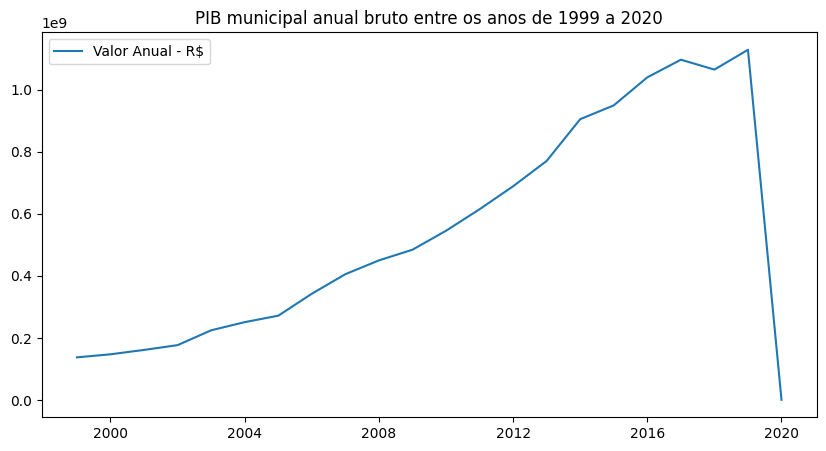

In [351]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_pib_analise.index, df_pib_analise['pib'], label='Valor Anual - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('PIB municipal anual bruto entre os anos de 1999 a 2020')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

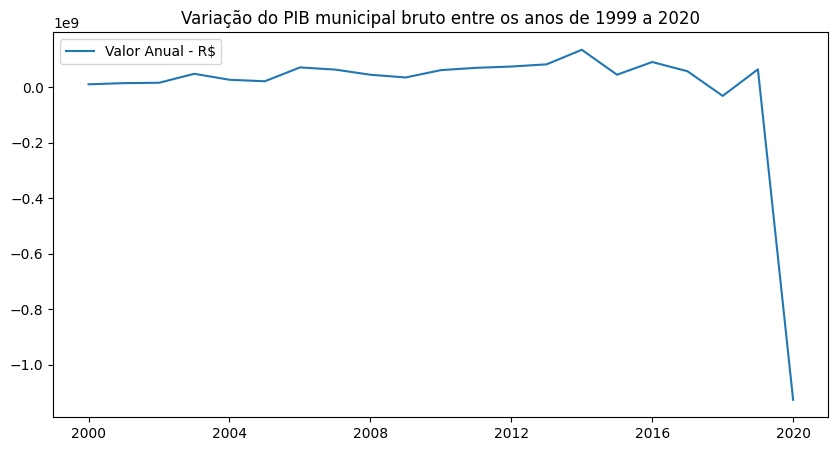

In [352]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_pib_analise.index, df_pib_analise['variacao_anual'], label='Valor Anual - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação do PIB municipal bruto entre os anos de 1999 a 2020')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

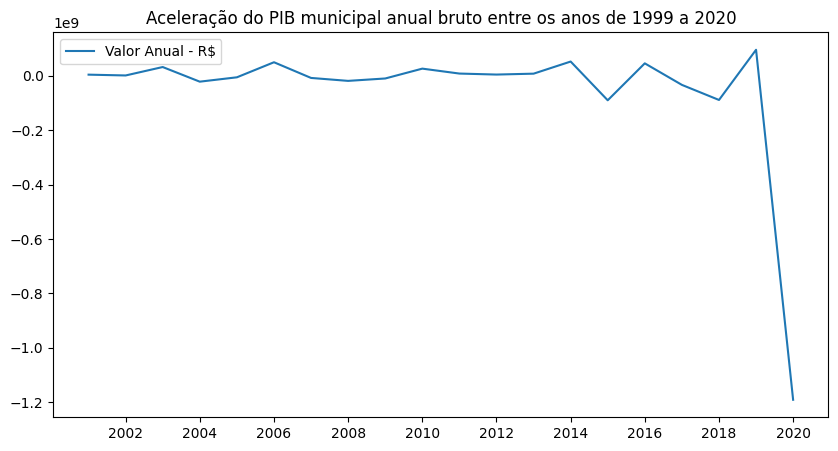

In [353]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_pib_analise.index, df_pib_analise['aceleracao_variacao_anual'], label='Valor Anual - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração do PIB municipal anual bruto entre os anos de 1999 a 2020')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

In [354]:
print(f"Total da variação do PIB municipal: R$ {df_pib_analise['variacao_anual'].sum().round(2)}")
print(f"Média móvel anual da variação do PIB municipal: R$ {(df_pib_analise['variacao_anual'].sum()/df_pib_analise.shape[0]).round(2)}")

Total da variação do PIB municipal: R$ -136622179.03
Média móvel anual da variação do PIB municipal: R$ -6210099.05


In [355]:
print(f"Total da aceleração da variação do PIB municipal: R$ {df_pib_analise['aceleracao_variacao_anual'].sum().round(2)}")
print(f"Média móvel anual da aceleração da variação do PIB municipal: R$ {(df_pib_analise['aceleracao_variacao_anual'].sum()/df_pib_analise.shape[0]).round(2)}")

Total da aceleração da variação do PIB municipal: R$ -1136829193.03
Média móvel anual da aceleração da variação do PIB municipal: R$ -51674054.23


In [356]:
print(f"Porcentagem da variação do PIB municipal: {df_pib_analise['porcentagem_variacao_anual_%'].sum().round(2)}%")
print(f"Média móvel percentual anual da variação do PIB municipal: {(df_pib_analise['porcentagem_variacao_anual_%'].sum()/df_pib_analise.shape[0]).round(2)}%")

Porcentagem da variação do PIB municipal: 125.89%
Média móvel percentual anual da variação do PIB municipal: 5.72%


In [357]:
print(f"Porcentagem da aceleração da variação do PIB municipal: {df_pib_analise['porcentagem_aceleracao_variacao_anual_%'].sum().round(2)}%")
print(f"Média móvel percentual anual da acelereção variação do PIB municipal: {(df_pib_analise['porcentagem_aceleracao_variacao_anual_%'].sum()/df_pib_analise.shape[0]).round(2)}%")

Porcentagem da aceleração da variação do PIB municipal: -1777.12%
Média móvel percentual anual da acelereção variação do PIB municipal: -80.78%


#### Valores brutos específicos

In [358]:
df_va_analise = df_valor_pib_analise.copy()
df_va_analise.drop(columns=['pib', 'impostos_liquidos'], inplace=True)

pd.options.display.float_format = '{:.2f}'.format
print(df_va_analise)

                     va  va_agropecuaria  va_industria  va_servicos  \
ano                                                                   
1999-01-01 119298000.00       4042000.00   15236000.00 100020000.00   
2000-01-01 125651000.00       4036000.00   16710000.00 104905000.00   
2001-01-01 138425000.00       2874000.00   19319000.00 116231000.00   
2002-01-01 148071794.00       6171138.00   15082778.00  75397206.00   
2003-01-01 189467636.00       6403772.00   16323628.00 105151942.00   
2004-01-01 217704403.00       5921732.00   22212434.00 122077465.00   
2005-01-01 236936307.00       5411566.00   22964689.00 131282173.00   
2006-01-01 297198084.00       6570423.00   25876534.00 173747873.00   
2007-01-01 352602584.00       5833151.00   35700733.00 210833472.00   
2008-01-01 392004625.00       7172882.00   33662815.00 234358517.00   
2009-01-01 419716226.00       8243712.00   37063349.00 253310493.00   
2010-01-01   4734208.00       7449096.00   64137889.00 250045077.00   
2011-0

In [359]:
# inferindo variação e acelaração anual dos valores brutos
df_va_analise['variacao_anual_va'] = df_va_analise['va'].diff()
df_va_analise['porcentagem_variacao_anual_va_%'] = ((df_va_analise['variacao_anual_va'] / df_va_analise['va'].shift(1)) * 100).round(2)
df_va_analise['aceleracao_variacao_anual_va'] = df_va_analise['variacao_anual_va'].diff()
df_va_analise['porcentagem_aceleracao_variacao_anual_va_%'] = ((df_va_analise['aceleracao_variacao_anual_va'] / df_va_analise['variacao_anual_va'].shift(1)) * 100).round(2)

In [360]:
# inferindo variação e acelaração anual dos valores brutos
df_va_analise['variacao_anual_va_agropecuaria'] = df_va_analise['va_agropecuaria'].diff()
df_va_analise['porcentagem_variacao_anual_va_agropecuaria_%'] = ((df_va_analise['variacao_anual_va_agropecuaria'] / df_va_analise['va_agropecuaria'].shift(1)) * 100).round(2)
df_va_analise['aceleracao_variacao_anual_va_agropecuaria'] = df_va_analise['variacao_anual_va_agropecuaria'].diff()
df_va_analise['porcentagem_aceleracao_variacao_anual_va_agropecuaria_%'] = ((df_va_analise['aceleracao_variacao_anual_va_agropecuaria'] / df_va_analise['variacao_anual_va_agropecuaria'].shift(1)) * 100).round(2)

In [361]:
# inferindo variação e acelaração anual dos valores brutos
df_va_analise['variacao_anual_va_industria'] = df_va_analise['va_industria'].diff()
df_va_analise['porcentagem_variacao_anual_va_industria_%'] = ((df_va_analise['variacao_anual_va_industria'] / df_va_analise['va_industria'].shift(1)) * 100).round(2)
df_va_analise['aceleracao_variacao_anual_va_industria'] = df_va_analise['variacao_anual_va_industria'].diff()
df_va_analise['porcentagem_aceleracao_variacao_anual_va_industria_%'] = ((df_va_analise['aceleracao_variacao_anual_va_industria'] / df_va_analise['variacao_anual_va_industria'].shift(1)) * 100).round(2)

In [362]:
# inferindo variação e acelaração anual dos valores brutos
df_va_analise['variacao_anual_va_servicos'] = df_va_analise['va_servicos'].diff()
df_va_analise['porcentagem_variacao_anual_va_servicos_%'] = ((df_va_analise['variacao_anual_va_servicos'] / df_va_analise['va_servicos'].shift(1)) * 100).round(2)
df_va_analise['aceleracao_variacao_anual_va_servicos'] = df_va_analise['variacao_anual_va_servicos'].diff()
df_va_analise['porcentagem_aceleracao_variacao_anual_va_servicos_%'] = ((df_va_analise['aceleracao_variacao_anual_va_servicos'] / df_va_analise['variacao_anual_va_servicos'].shift(1)) * 100).round(2)

In [363]:
# inferindo variação e acelaração anual dos valores brutos
df_va_analise['variacao_anual_va_adespss'] = df_va_analise['va_adespss'].diff()
df_va_analise['porcentagem_variacao_anual_va_adespss_%'] = ((df_va_analise['variacao_anual_va_adespss'] / df_va_analise['va_adespss'].shift(1)) * 100).round(2)
df_va_analise['aceleracao_variacao_anual_va_adespss'] = df_va_analise['variacao_anual_va_adespss'].diff()
df_va_analise['porcentagem_aceleracao_variacao_anual_va_adespss_%'] = ((df_va_analise['aceleracao_variacao_anual_va_adespss'] / df_va_analise['variacao_anual_va_adespss'].shift(1)) * 100).round(2)
df_va_analise

,va,va_agropecuaria,va_industria,va_servicos,va_adespss,variacao_anual_va,porcentagem_variacao_anual_va_%,aceleracao_variacao_anual_va,porcentagem_aceleracao_variacao_anual_va_%,variacao_anual_va_agropecuaria,...,aceleracao_variacao_anual_va_industria,porcentagem_aceleracao_variacao_anual_va_industria_%,variacao_anual_va_servicos,porcentagem_variacao_anual_va_servicos_%,aceleracao_variacao_anual_va_servicos,porcentagem_aceleracao_variacao_anual_va_servicos_%,variacao_anual_va_adespss,porcentagem_variacao_anual_va_adespss_%,aceleracao_variacao_anual_va_adespss,porcentagem_aceleracao_variacao_anual_va_adespss_%
ano,,,,,,,,,,,,,,,,,,,,,
1999-01-01,119298000.00,4042000.00,15236000.00,100020000.00,31895000.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-01,125651000.00,4036000.00,16710000.00,104905000.00,32198000.00,6353000.00,5.33,NaN,NaN,-6000.00,...,NaN,NaN,4885000.00,4.88,NaN,NaN,303000.00,0.95,NaN,NaN
2001-01-01,138425000.00,2874000.00,19319000.00,116231000.00,44545000.00,12774000.00,10.17,6421000.00,101.07,-1162000.00,...,1135000.00,77.00,11326000.00,10.80,6441000.00,131.85,12347000.00,38.35,12044000.00,3974.92
2002-01-01,148071794.00,6171138.00,15082778.00,75397206.00,51420672.00,9646794.00,6.97,-3127206.00,-24.48,3297138.00,...,-6845222.00,-262.37,-40833794.00,-35.13,-52159794.00,-460.53,6875672.00,15.44,-5471328.00,-44.31
2003-01-01,189467636.00,6403772.00,16323628.00,105151942.00,61588293.00,41395842.00,27.96,31749048.00,329.12,232634.00,...,5477072.00,-129.29,29754736.00,39.46,70588530.00,-172.87,10167621.00,19.77,3291949.00,47.88
2004-01-01,217704403.00,5921732.00,22212434.00,122077465.00,67492773.00,28236767.00,14.90,-13159075.00,-31.79,-482040.00,...,4647956.00,374.58,16925523.00,16.10,-12829213.00,-43.12,5904480.00,9.59,-4263141.00,-41.93
2005-01-01,236936307.00,5411566.00,22964689.00,131282173.00,7727788.00,19231904.00,8.83,-9004863.00,-31.89,-510166.00,...,-5136551.00,-87.23,9204708.00,7.54,-7720815.00,-45.62,-59764985.00,-88.55,-65669465.00,-1112.20
2006-01-01,297198084.00,6570423.00,25876534.00,173747873.00,91003255.00,60261777.00,25.43,41029873.00,213.34,1158857.00,...,2159590.00,287.08,42465700.00,32.35,33260992.00,361.35,83275467.00,1077.61,143040452.00,-239.34
2007-01-01,352602584.00,5833151.00,35700733.00,210833472.00,100235228.00,55404500.00,18.64,-4857277.00,-8.06,-737272.00,...,6912354.00,237.39,37085599.00,21.34,-5380101.00,-12.67,9231973.00,10.14,-74043494.00,-88.91


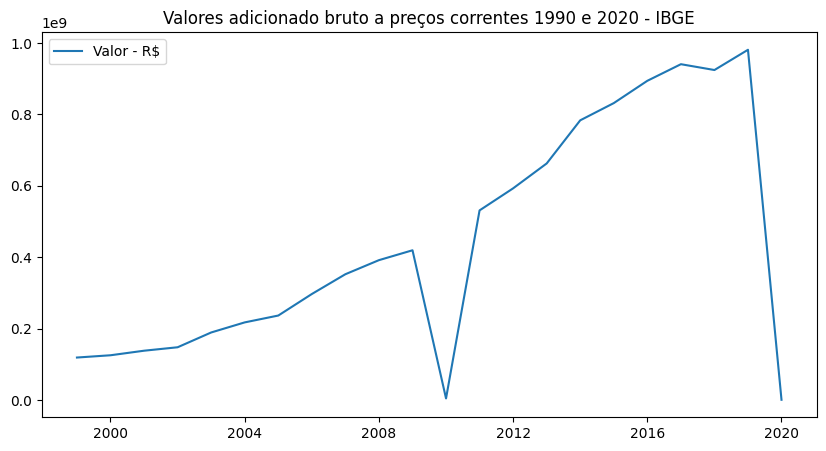

In [364]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['va'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Valores adicionado bruto a preços correntes 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

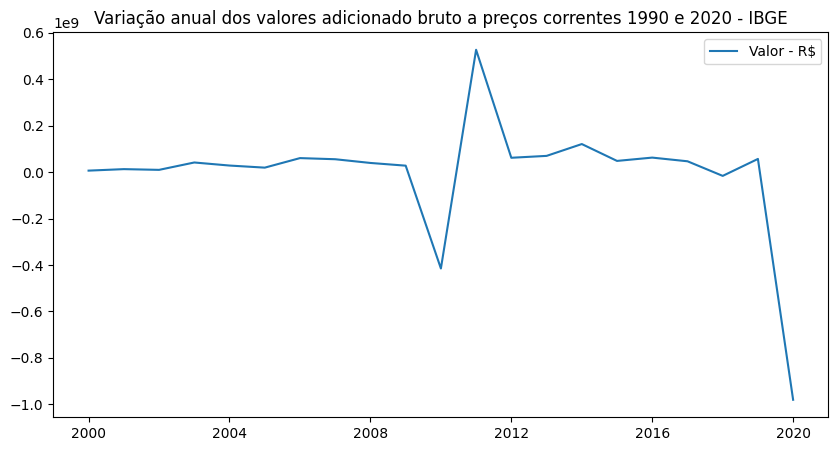

In [365]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['variacao_anual_va'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação anual dos valores adicionado bruto a preços correntes 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

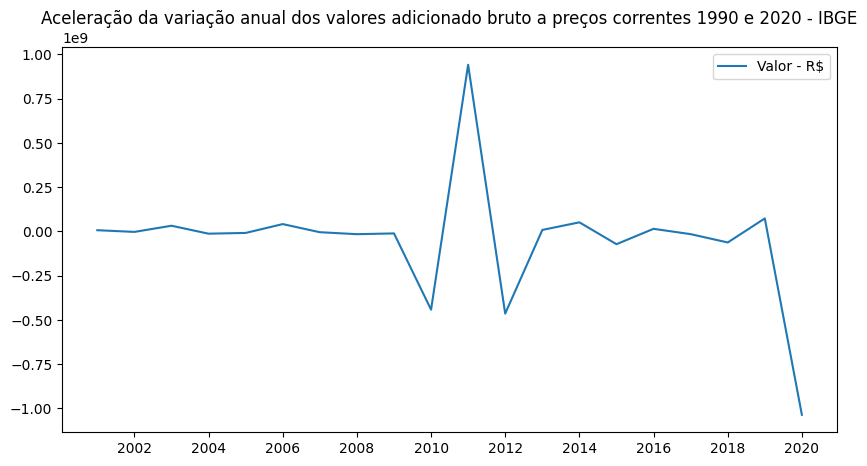

In [366]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['aceleracao_variacao_anual_va'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração da variação anual dos valores adicionado bruto a preços correntes 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

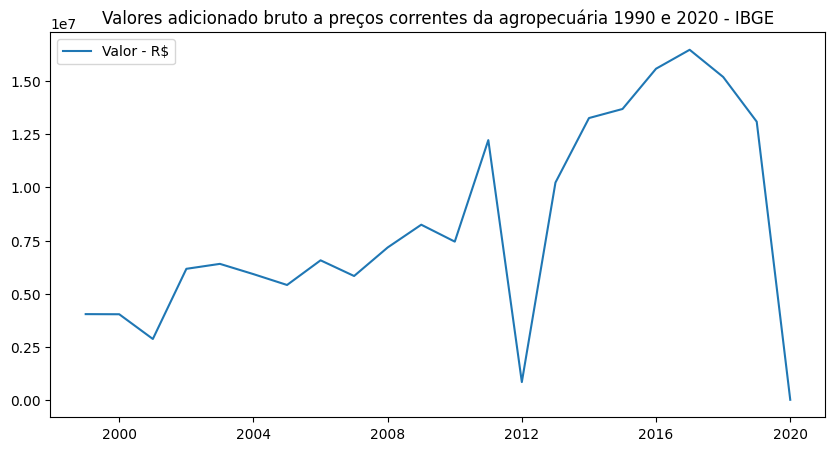

In [367]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['va_agropecuaria'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Valores adicionado bruto a preços correntes da agropecuária 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

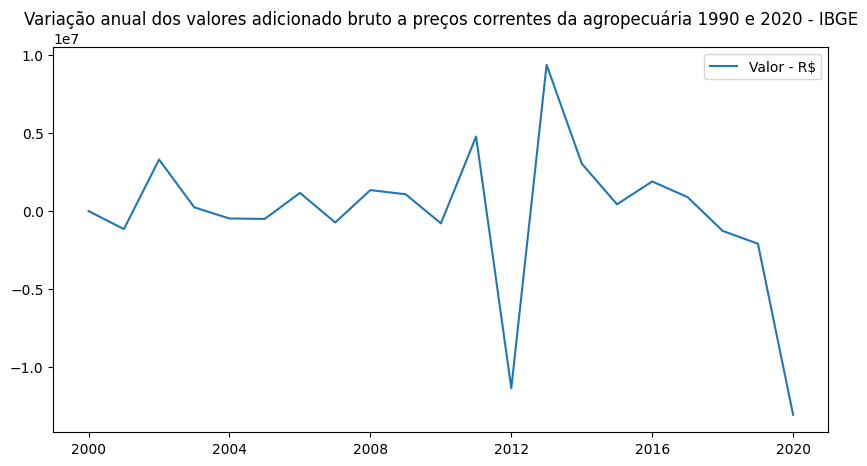

In [368]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['variacao_anual_va_agropecuaria'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação anual dos valores adicionado bruto a preços correntes da agropecuária 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

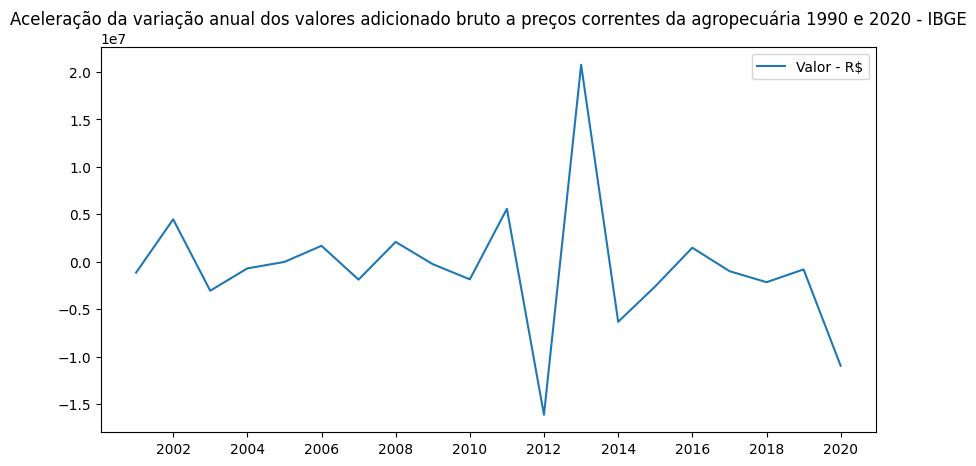

In [369]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['aceleracao_variacao_anual_va_agropecuaria'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração da variação anual dos valores adicionado bruto a preços correntes da agropecuária 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

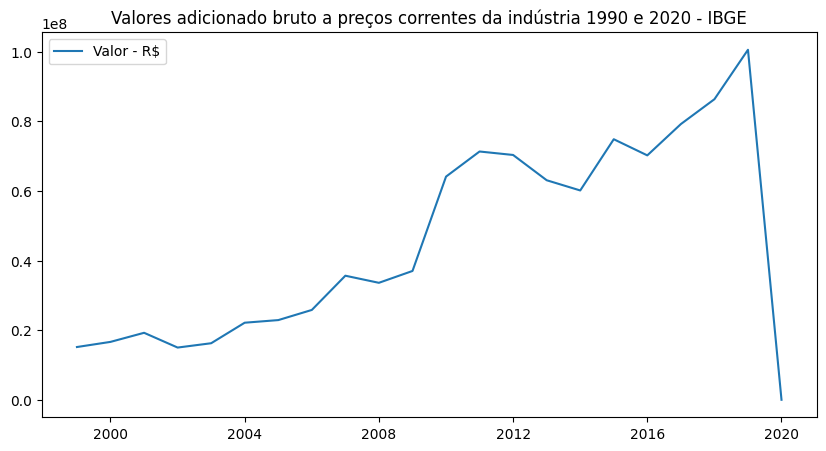

In [370]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['va_industria'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Valores adicionado bruto a preços correntes da indústria 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

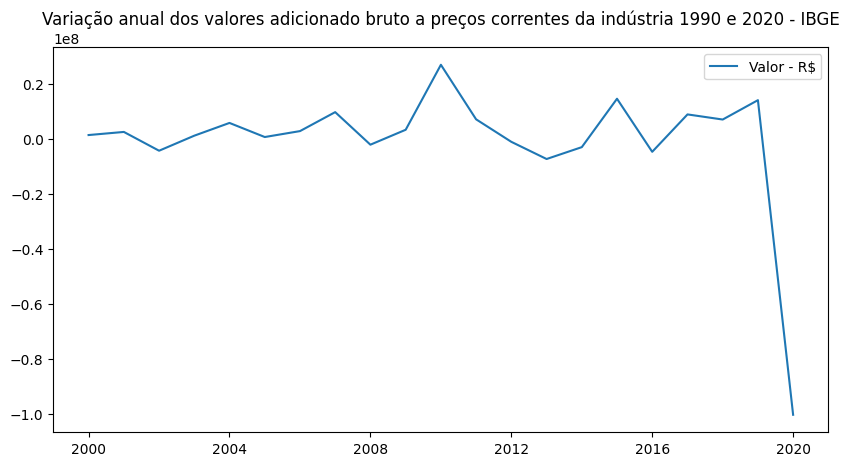

In [371]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['variacao_anual_va_industria'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação anual dos valores adicionado bruto a preços correntes da indústria 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

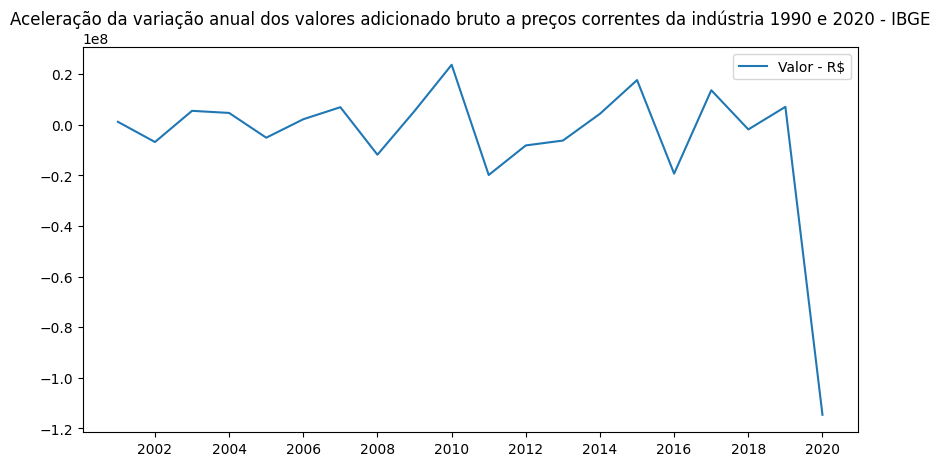

In [372]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['aceleracao_variacao_anual_va_industria'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração da variação anual dos valores adicionado bruto a preços correntes da indústria 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

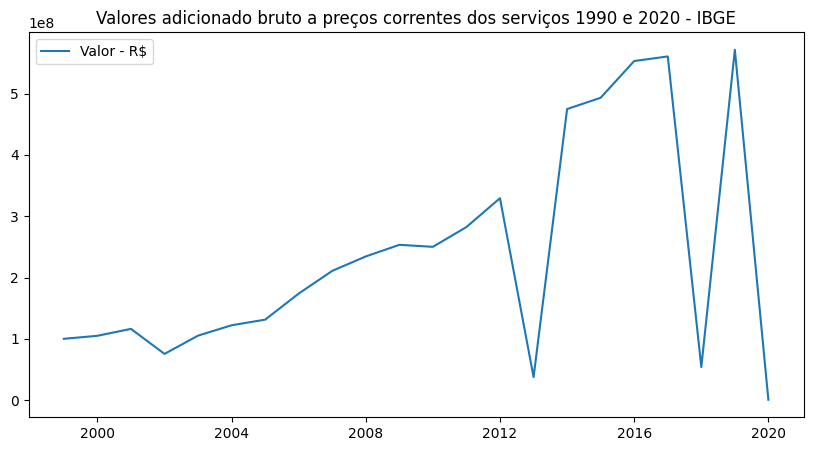

In [373]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['va_servicos'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Valores adicionado bruto a preços correntes dos serviços 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

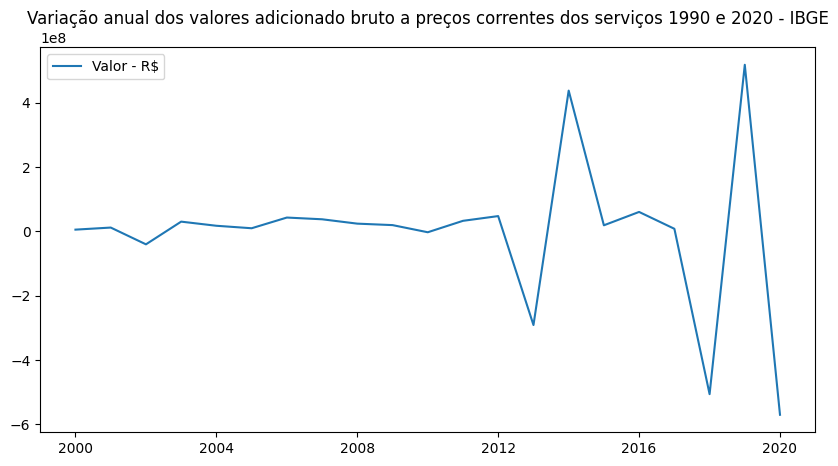

In [374]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['variacao_anual_va_servicos'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação anual dos valores adicionado bruto a preços correntes dos serviços 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

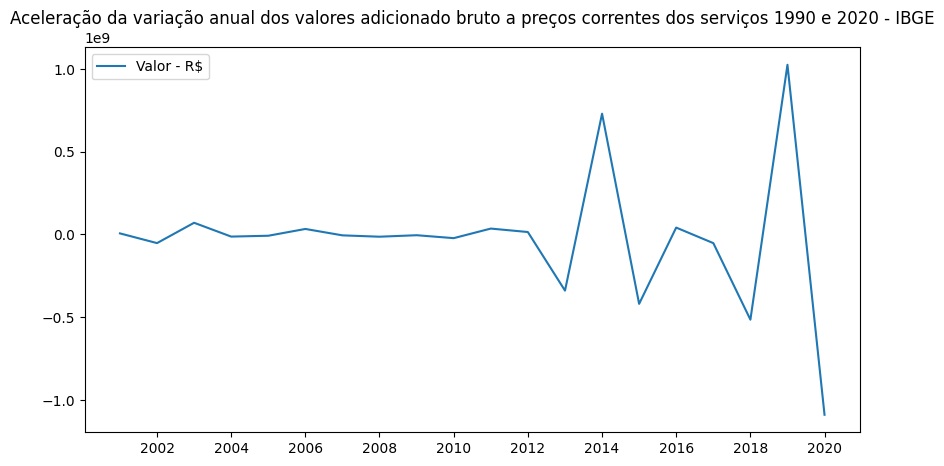

In [375]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['aceleracao_variacao_anual_va_servicos'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração da variação anual dos valores adicionado bruto a preços correntes dos serviços 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

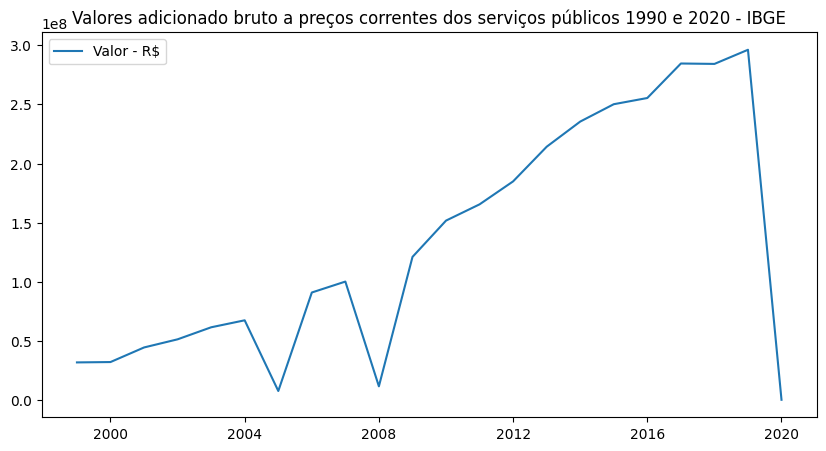

In [376]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['va_adespss'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Valores adicionado bruto a preços correntes dos serviços públicos 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

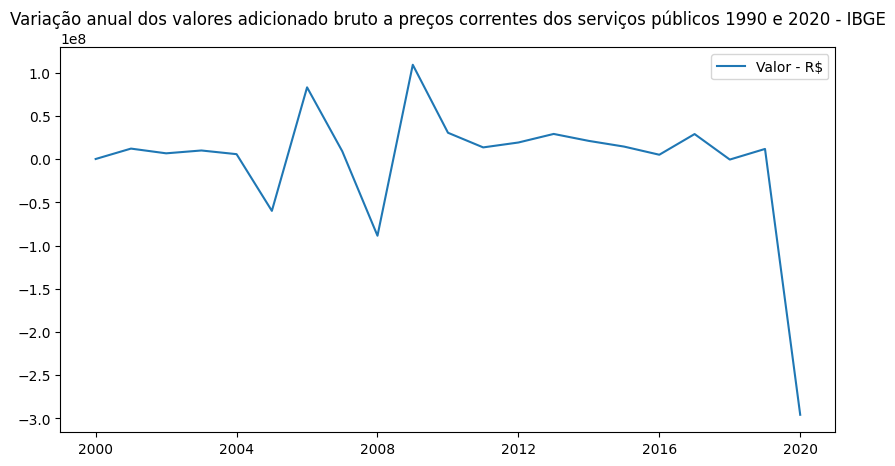

In [377]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['variacao_anual_va_adespss'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação anual dos valores adicionado bruto a preços correntes dos serviços públicos 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

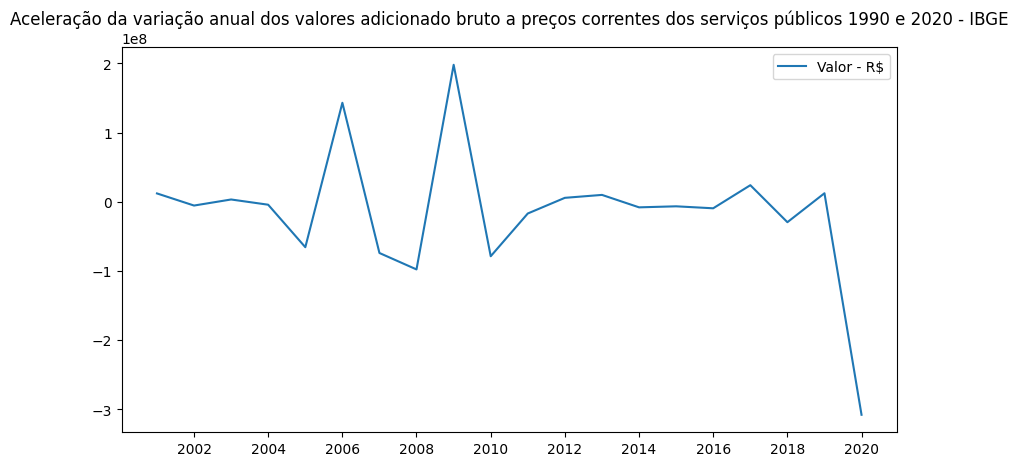

In [378]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df_va_analise.index, df_va_analise['aceleracao_variacao_anual_va_adespss'], label='Valor - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração da variação anual dos valores adicionado bruto a preços correntes dos serviços públicos 1990 e 2020 - IBGE')

# Exibe o gráfico
plt.show()

In [379]:
# Variação da receita bruta anual
print(f"Total da variação anual da receita bruta anual entre 1999 e 2020: R$ {df_va_analise['variacao_anual_va'].sum().round(2)}")
print(f"Média móvel da variação anual: R$ {(df_va_analise['variacao_anual_va'].sum()/df_va_analise.shape[0]).round(2)}")

# Aceleração da variação da receita bruta anual
print(f"\nTotal da aceleração da variação anual da receita bruta entre 1999 e 2020: R$ {df_va_analise['aceleracao_variacao_anual_va'].sum().round(2)}")
print(f"Média móvel anual da aceleração da variação anual da receita bruta: R${(df_va_analise['aceleracao_variacao_anual_va'].sum()/df_va_analise.shape[0]).round(2)}")

# Porcentagem da variação da receita bruta anual
print(f"\nPorcentagem da variação anual da receita bruta entre 1999 e 2020: {df_va_analise['porcentagem_variacao_anual_va_%'].sum().round(2)}%")
print(f"Média percentual móvel anual da variação anual da receita bruta: {(df_va_analise['porcentagem_variacao_anual_va_%'].sum()/df_va_analise.shape[0]).round(2)}%")

# Porcentagem da aceleração da variação da receita bruta anual
print(f"\nPorcentagem da aceleração da variação anual da receita bruta entre 1999 e 2020: {df_va_analise['porcentagem_aceleracao_variacao_anual_va_%'].sum().round(2)}%")
print(f"Média percentual móvel anual da aceleração da variação anual da receita bruta: {(df_va_analise['porcentagem_aceleracao_variacao_anual_va_%'].sum()/df_va_analise.shape[0]).round(2)}%")

Total da variação anual da receita bruta anual entre 1999 e 2020: R$ -118313109.62
Média móvel da variação anual: R$ -5377868.62

Total da aceleração da variação anual da receita bruta entre 1999 e 2020: R$ -986636348.62
Média móvel anual da aceleração da variação anual da receita bruta: R$-44847106.76

Porcentagem da variação anual da receita bruta entre 1999 e 2020: 11127.44%
Média percentual móvel anual da variação anual da receita bruta: 505.79%

Porcentagem da aceleração da variação anual da receita bruta entre 1999 e 2020: -3805.5%
Média percentual móvel anual da aceleração da variação anual da receita bruta: -172.98%


In [380]:
# Variação da receita bruta anual da agropecuária
print(f"Total da variação anual da receita bruta da agropecuária entre 1999 e 2020: R$ {df_va_analise['variacao_anual_va_agropecuaria'].sum().round(2)}")
print(f"Média móvel da variação da agropecuária anual: R$ {(df_va_analise['variacao_anual_va_agropecuaria'].sum()/df_va_analise.shape[0]).round(2)}")

# Aceleração da variação da receita bruta anual da agropecuária 
print(f"\nTotal da aceleração da variação anual da receita bruta da agropecuária entre 1999 e 2020: R$ {df_va_analise['aceleracao_variacao_anual_va_agropecuaria'].sum().round(2)}")
print(f"Média móvel anual da aceleração da variação anual da receita bruta da agropecuária: R${(df_va_analise['aceleracao_variacao_anual_va_agropecuaria'].sum()/df_va_analise.shape[0]).round(2)}")

# Porcentagem da variação da receita bruta anual da agropecuária 
print(f"\nPorcentagem da variação anual da receita bruta da agropecuária entre 1999 e 2020: {df_va_analise['porcentagem_variacao_anual_va_agropecuaria_%'].sum().round(2)}%")
print(f"Média percentual móvel anual da variação anual da receita bruta da agropecuária: {(df_va_analise['porcentagem_variacao_anual_va_agropecuaria_%'].sum()/df_va_analise.shape[0]).round(2)}%")

# Porcentagem da aceleração da variação da receita bruta anual da agropecuária 
print(f"\nPorcentagem da aceleração da variação anual da receita bruta da agropecuária entre 1999 e 2020: {df_va_analise['porcentagem_aceleracao_variacao_anual_va_agropecuaria_%'].sum().round(2)}%")
print(f"Média percentual móvel anual da aceleração da variação anual da receita bruta da agropecuária: {(df_va_analise['porcentagem_aceleracao_variacao_anual_va_agropecuaria_%'].sum()/df_va_analise.shape[0]).round(2)}%")

Total da variação anual da receita bruta da agropecuária entre 1999 e 2020: R$ -4025155.35
Média móvel da variação da agropecuária anual: R$ -182961.61

Total da aceleração da variação anual da receita bruta da agropecuária entre 1999 e 2020: R$ -13063266.35
Média móvel anual da aceleração da variação anual da receita bruta da agropecuária: R$-593784.83

Porcentagem da variação anual da receita bruta da agropecuária entre 1999 e 2020: 1116.95%
Média percentual móvel anual da variação anual da receita bruta da agropecuária: 50.77%

Porcentagem da aceleração da variação anual da receita bruta da agropecuária entre 1999 e 2020: 16781.24%
Média percentual móvel anual da aceleração da variação anual da receita bruta da agropecuária: 762.78%


In [381]:
# Variação da receita bruta anual da indústria
print(f"Total da variação anual da receita bruta da indústria entre 1999 e 2020: R$ {df_va_analise['variacao_anual_va_industria'].sum().round(2)}")
print(f"Média móvel da variação da indústria anual: R$ {(df_va_analise['variacao_anual_va_industria'].sum()/df_va_analise.shape[0]).round(2)}")

# Aceleração da variação da receita bruta anual da indústria 
print(f"\nTotal da aceleração da variação anual da receita bruta da indústria entre 1999 e 2020: R$ {df_va_analise['aceleracao_variacao_anual_va_industria'].sum().round(2)}")
print(f"Média móvel anual da aceleração da variação anual da receita bruta da indústria: R${(df_va_analise['aceleracao_variacao_anual_va_industria'].sum()/df_va_analise.shape[0]).round(2)}")

# Porcentagem da variação da receita bruta anual da indústria 
print(f"\nPorcentagem da variação anual da receita bruta da indústria entre 1999 e 2020: {df_va_analise['porcentagem_variacao_anual_va_industria_%'].sum().round(2)}%")
print(f"Média percentual móvel anual da variação anual da receita bruta da indústria: {(df_va_analise['porcentagem_variacao_anual_va_industria_%'].sum()/df_va_analise.shape[0]).round(2)}%")

# Porcentagem da aceleração da variação da receita bruta anual da indústria 
print(f"\nPorcentagem da aceleração da variação anual da receita bruta da indústria entre 1999 e 2020: {df_va_analise['porcentagem_aceleracao_variacao_anual_va_industria_%'].sum().round(2)}%")
print(f"Média percentual móvel anual da aceleração da variação anual da receita bruta da indústria: {(df_va_analise['porcentagem_aceleracao_variacao_anual_va_industria_%'].sum()/df_va_analise.shape[0]).round(2)}%")

Total da variação anual da receita bruta da indústria entre 1999 e 2020: R$ -15137759.87
Média móvel da variação da indústria anual: R$ -688079.99

Total da aceleração da variação anual da receita bruta da indústria entre 1999 e 2020: R$ -101908680.87
Média móvel anual da aceleração da variação anual da receita bruta da indústria: R$-4632212.77

Porcentagem da variação anual da receita bruta da indústria entre 1999 e 2020: 130.59%
Média percentual móvel anual da variação anual da receita bruta da indústria: 5.94%

Porcentagem da aceleração da variação anual da receita bruta da indústria entre 1999 e 2020: -566.6%
Média percentual móvel anual da aceleração da variação anual da receita bruta da indústria: -25.75%


In [382]:
# Variação da receita bruta anual da serviços
print(f"Total da variação anual da receita bruta da serviços entre 1999 e 2020: R$ {df_va_analise['variacao_anual_va_adespss'].sum().round(2)}")
print(f"Média móvel da variação da serviços anual: R$ {(df_va_analise['variacao_anual_va_adespss'].sum()/df_va_analise.shape[0]).round(2)}")

# Aceleração da variação da receita bruta anual da serviços 
print(f"\nTotal da aceleração da variação anual da receita bruta da serviços entre 1999 e 2020: R$ {df_va_analise['aceleracao_variacao_anual_va_adespss'].sum().round(2)}")
print(f"Média móvel anual da aceleração da variação anual da receita bruta da serviços: R${(df_va_analise['aceleracao_variacao_anual_va_adespss'].sum()/df_va_analise.shape[0]).round(2)}")

# Porcentagem da variação da receita bruta anual da serviços 
print(f"\nPorcentagem da variação anual da receita bruta da serviços entre 1999 e 2020: {df_va_analise['porcentagem_variacao_anual_va_adespss_%'].sum().round(2)}%")
print(f"Média percentual móvel anual da variação anual da receita bruta da serviços: {(df_va_analise['porcentagem_variacao_anual_va_adespss_%'].sum()/df_va_analise.shape[0]).round(2)}%")

# Porcentagem da aceleração da variação da receita bruta anual da serviços 
print(f"\nPorcentagem da aceleração da variação anual da receita bruta da serviços entre 1999 e 2020: {df_va_analise['porcentagem_aceleracao_variacao_anual_va_adespss_%'].sum().round(2)}%")
print(f"Média percentual móvel anual da aceleração da variação anual da receita bruta da serviços: {(df_va_analise['porcentagem_aceleracao_variacao_anual_va_adespss_%'].sum()/df_va_analise.shape[0]).round(2)}%")

Total da variação anual da receita bruta da serviços entre 1999 e 2020: R$ -31592829.1
Média móvel da variação da serviços anual: R$ -1436037.69

Total da aceleração da variação anual da receita bruta da serviços entre 1999 e 2020: R$ -296205455.1
Média móvel anual da aceleração da variação anual da receita bruta da serviços: R$-13463884.32

Porcentagem da variação anual da receita bruta da serviços entre 1999 e 2020: 1927.48%
Média percentual móvel anual da variação anual da receita bruta da serviços: 87.61%

Porcentagem da aceleração da variação anual da receita bruta da serviços entre 1999 e 2020: -4671.59%
Média percentual móvel anual da aceleração da variação anual da receita bruta da serviços: -212.34%


In [383]:
# Variação da receita bruta anual da serviços exclusivos da Adm. Pública
print(f"Total da variação anual da receita bruta da serviços exclusivos da Adm. Pública entre 1999 e 2020: R$ {df_va_analise['variacao_anual_va_servicos'].sum().round(2)}")
print(f"Média móvel da variação da serviços anual: R$ {(df_va_analise['variacao_anual_va_servicos'].sum()/df_va_analise.shape[0]).round(2)}")

# Aceleração da variação da receita bruta anual da serviços 
print(f"\nTotal da aceleração da variação anual da receita bruta da serviços exclusivos da Adm. Pública entre 1999 e 2020: R$ {df_va_analise['aceleracao_variacao_anual_va_servicos'].sum().round(2)}")
print(f"Média móvel anual da aceleração da variação anual da receita bruta da serviços: R${(df_va_analise['aceleracao_variacao_anual_va_servicos'].sum()/df_va_analise.shape[0]).round(2)}")

# Porcentagem da variação da receita bruta anual da serviços 
print(f"\nPorcentagem da variação anual da receita bruta da serviços exclusivos da Adm. Pública entre 1999 e 2020: {df_va_analise['porcentagem_variacao_anual_va_servicos_%'].sum().round(2)}%")
print(f"Média percentual móvel anual da variação anual da receita bruta da serviços: {(df_va_analise['porcentagem_variacao_anual_va_servicos_%'].sum()/df_va_analise.shape[0]).round(2)}%")

# Porcentagem da aceleração da variação da receita bruta anual da serviços 
print(f"\nPorcentagem da aceleração da variação anual da receita bruta da serviços exclusivos da Adm. Pública entre 1999 e 2020: {df_va_analise['porcentagem_aceleracao_variacao_anual_va_servicos_%'].sum().round(2)}%")
print(f"Média percentual móvel anual da aceleração da variação anual da receita bruta da serviços: {(df_va_analise['porcentagem_aceleracao_variacao_anual_va_servicos_%'].sum()/df_va_analise.shape[0]).round(2)}%")

Total da variação anual da receita bruta da serviços exclusivos da Adm. Pública entre 1999 e 2020: R$ -99452365.3
Média móvel da variação da serviços anual: R$ -4520562.06

Total da aceleração da variação anual da receita bruta da serviços exclusivos da Adm. Pública entre 1999 e 2020: R$ -575761946.3
Média móvel anual da aceleração da variação anual da receita bruta da serviços: R$-26170997.56

Porcentagem da variação anual da receita bruta da serviços exclusivos da Adm. Pública entre 1999 e 2020: 2008.79%
Média percentual móvel anual da variação anual da receita bruta da serviços: 91.31%

Porcentagem da aceleração da variação anual da receita bruta da serviços exclusivos da Adm. Pública entre 1999 e 2020: -9643.48%
Média percentual móvel anual da aceleração da variação anual da receita bruta da serviços: -438.34%


#### Impostos líquidos

In [384]:
df_impostos_analise = df_valor_pib_analise.copy()
df_impostos_analise.drop(columns=['pib','va', 'va_agropecuaria', 'va_industria', 'va_servicos', 'va_adespss'], inplace=True)

pd.options.display.float_format = '{:.2f}'.format
print(df_impostos_analise)

            impostos_liquidos
ano                          
1999-01-01        18381000.00
2000-01-01        21854000.00
2001-01-01        23191000.00
2002-01-01         2897748.00
2003-01-01        35319092.00
2004-01-01        33342224.00
2005-01-01        34917409.00
2006-01-01         4535936.00
2007-01-01        52878472.00
2008-01-01        57799257.00
2009-01-01        64634475.00
2010-01-01        71900364.00
2011-01-01        83189966.00
2012-01-01        95375054.00
2013-01-01        10738138.00
2014-01-01       120932642.00
2015-01-01       117138144.00
2016-01-01       144956681.00
2017-01-01       155252578.00
2018-01-01       139658974.00
2019-01-01       146789776.00
2020-01-01          149580.22


In [385]:
# inferindo variação e acelaração anual dos impostos líquidos
df_impostos_analise['variacao_anual'] = df_impostos_analise['impostos_liquidos'].diff()
df_impostos_analise['porcentagem_variacao_anual_%'] = ((df_impostos_analise['variacao_anual'] / df_impostos_analise['impostos_liquidos'].shift(1)) * 100).round(2)
df_impostos_analise['aceleracao_variacao_anual'] = df_impostos_analise['variacao_anual'].diff()
df_impostos_analise['porcentagem_aceleracao_variacao_anual_%'] = ((df_impostos_analise['aceleracao_variacao_anual'] / df_impostos_analise['variacao_anual'].shift(1)) * 100).round(2)
df_impostos_analise

,impostos_liquidos,variacao_anual,porcentagem_variacao_anual_%,aceleracao_variacao_anual,porcentagem_aceleracao_variacao_anual_%
ano,,,,,
1999-01-01,18381000.00,NaN,NaN,NaN,NaN
2000-01-01,21854000.00,3473000.00,18.89,NaN,NaN
2001-01-01,23191000.00,1337000.00,6.12,-2136000.00,-61.50
2002-01-01,2897748.00,-20293252.00,-87.50,-21630252.00,-1617.82
2003-01-01,35319092.00,32421344.00,1118.85,52714596.00,-259.76
2004-01-01,33342224.00,-1976868.00,-5.60,-34398212.00,-106.10
2005-01-01,34917409.00,1575185.00,4.72,3552053.00,-179.68
2006-01-01,4535936.00,-30381473.00,-87.01,-31956658.00,-2028.76
2007-01-01,52878472.00,48342536.00,1065.77,78724009.00,-259.12


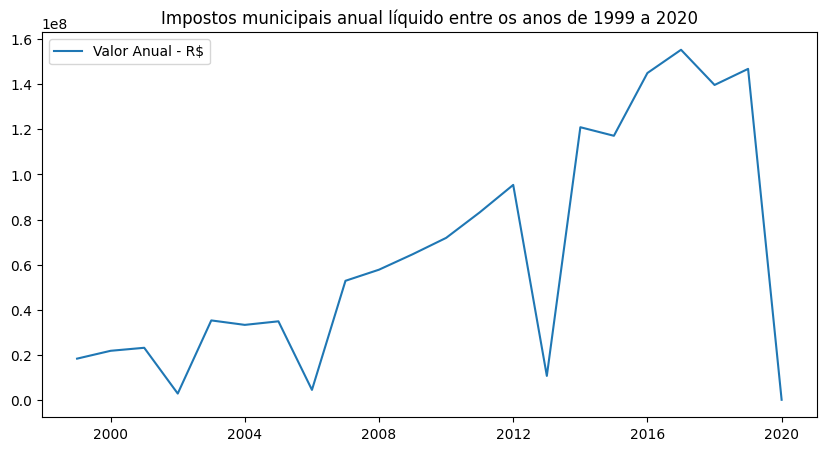

In [386]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_impostos_analise.index, df_impostos_analise['impostos_liquidos'], label='Valor Anual - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Impostos municipais anual líquido entre os anos de 1999 a 2020')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

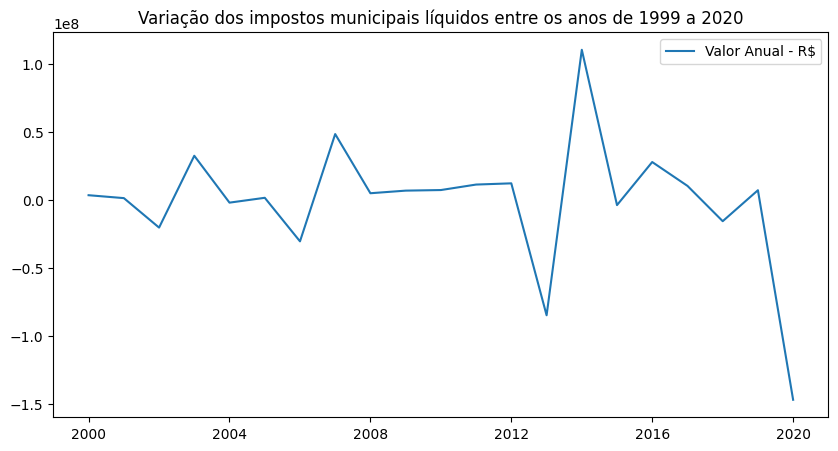

In [387]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_impostos_analise.index, df_impostos_analise['variacao_anual'], label='Valor Anual - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação dos impostos municipais líquidos entre os anos de 1999 a 2020')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

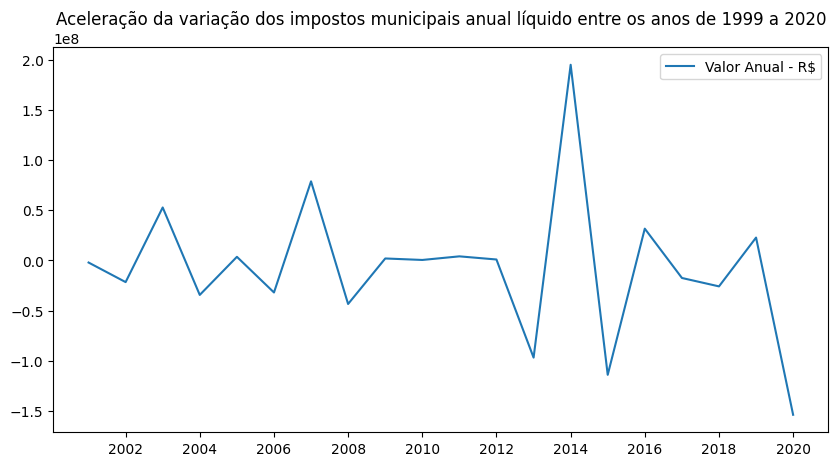

In [388]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_impostos_analise.index, df_impostos_analise['aceleracao_variacao_anual'], label='Valor Anual - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração da variação dos impostos municipais anual líquido entre os anos de 1999 a 2020')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

In [389]:
# Total da variação dos impostos líquidos
print(f"Total da variação dos impostos líquidos municipais entre 1999 e 2020: R$ {df_impostos_analise['variacao_anual'].sum().round(2)}")
print(f"Média móvel anual da variação dos impostos líquidos municipais: R$ {(df_impostos_analise['variacao_anual'].sum()/df_impostos_analise.shape[0]).round(2)}")

# Total da aceleração da variação dos impostos líquidos
print(f"\nTotal da aceleração da variação dos impostos líquidos municipais entre 1999 e 2020: R$ {df_impostos_analise['aceleracao_variacao_anual'].sum().round(2)}")
print(f"Média móvel anual da aceleração da variação dos impostos líquidos municipais: R$ {(df_impostos_analise['aceleracao_variacao_anual'].sum()/df_impostos_analise.shape[0]).round(2)}")

# Porcentagem da variação dos impostos líquidos
print(f"\nPorcentagem da variação dos impostos líquidos municipais entre 1999 e 2020: {df_impostos_analise['porcentagem_variacao_anual_%'].sum().round(2)}%")
print(f"Média móvel percentual anual da variação dos impostos líquidos municipais: {(df_impostos_analise['porcentagem_variacao_anual_%'].sum()/df_impostos_analise.shape[0]).round(2)}%")

# Porcentagem da aceleração da variação dos impostos líquidos
print(f"\nPorcentagem da aceleração da variação dos impostos líquidos municipais entre 1999 e 2020: {df_impostos_analise['porcentagem_aceleracao_variacao_anual_%'].sum().round(2)}%")
print(f"Média móvel percentual anual da acelereção variação dos impostos líquidos municipais: {(df_impostos_analise['porcentagem_aceleracao_variacao_anual_%'].sum()/df_impostos_analise.shape[0]).round(2)}%")

Total da variação dos impostos líquidos municipais entre 1999 e 2020: R$ -18231419.78
Média móvel anual da variação dos impostos líquidos municipais: R$ -828700.9

Total da aceleração da variação dos impostos líquidos municipais entre 1999 e 2020: R$ -150113195.78
Média móvel anual da aceleração da variação dos impostos líquidos municipais: R$ -6823327.08

Porcentagem da variação dos impostos líquidos municipais entre 1999 e 2020: 2957.31%
Média móvel percentual anual da variação dos impostos líquidos municipais: 134.42%

Porcentagem da aceleração da variação dos impostos líquidos municipais entre 1999 e 2020: -9072.0%
Média móvel percentual anual da acelereção variação dos impostos líquidos municipais: -412.36%


### Time series das receitas

#### Por meses

In [390]:
# verificando se há valores nulos
df_receitas.isna().value_counts()

COD_RECEITA  DATA   COD_CONTRIBUINTE  VALOR_ARRECADADO  FONTE_DADOS
False        False  False             False             False          102293
dtype: int64

In [391]:
df_receitas.dtypes

COD_RECEITA                  int64
DATA                datetime64[ns]
COD_CONTRIBUINTE            object
VALOR_ARRECADADO           float64
FONTE_DADOS                 object
dtype: object

In [392]:
# criando df para analises dos dados
df_receitas_analise = df_receitas[['DATA','VALOR_ARRECADADO']]

# criando coluna mês-ano para agrupar os dados
df_receitas_analise['mes_ano'] = pd.to_datetime(df_receitas_analise['DATA'].dt.strftime("%m-%Y"))

# agrupando os dados no df e deletando coluna das datas
df_receitas_analise.drop(columns=('DATA'), inplace=True)
df_receitas_analise = df_receitas_analise.groupby('mes_ano').sum()
df_receitas_analise

,VALOR_ARRECADADO
mes_ano,
2013-01-01,5865563.10
2013-02-01,6979863.94
2013-03-01,6038308.84
2013-04-01,6036720.77
2013-05-01,6566028.25
...,...
2022-08-01,15546474.80
2022-09-01,14755666.11
2022-10-01,13494171.35


In [393]:
df_receitas_analise['variacao_mensal'] = df_receitas_analise['VALOR_ARRECADADO'].diff()
df_receitas_analise['porcentagem_variacao_mensal_%'] = ((df_receitas_analise['variacao_mensal'] / df_receitas_analise['VALOR_ARRECADADO'].shift(1)) * 100).round(2)
df_receitas_analise['aceleracao_variacao_mensal'] = df_receitas_analise['variacao_mensal'].diff()
df_receitas_analise['porcentagem_aceleracao_variacao_mensal_%'] = ((df_receitas_analise['aceleracao_variacao_mensal'] / df_receitas_analise['variacao_mensal'].shift(1)) * 100).round(2)
df_receitas_analise

,VALOR_ARRECADADO,variacao_mensal,porcentagem_variacao_mensal_%,aceleracao_variacao_mensal,porcentagem_aceleracao_variacao_mensal_%
mes_ano,,,,,
2013-01-01,5865563.10,NaN,NaN,NaN,NaN
2013-02-01,6979863.94,1114300.84,19.00,NaN,NaN
2013-03-01,6038308.84,-941555.10,-13.49,-2055855.94,-184.50
2013-04-01,6036720.77,-1588.07,-0.03,939967.03,-99.83
2013-05-01,6566028.25,529307.48,8.77,530895.55,-33430.24
...,...,...,...,...,...
2022-08-01,15546474.80,-5207873.52,-25.09,-1413654.65,37.26
2022-09-01,14755666.11,-790808.69,-5.09,4417064.83,-84.82
2022-10-01,13494171.35,-1261494.76,-8.55,-470686.07,59.52


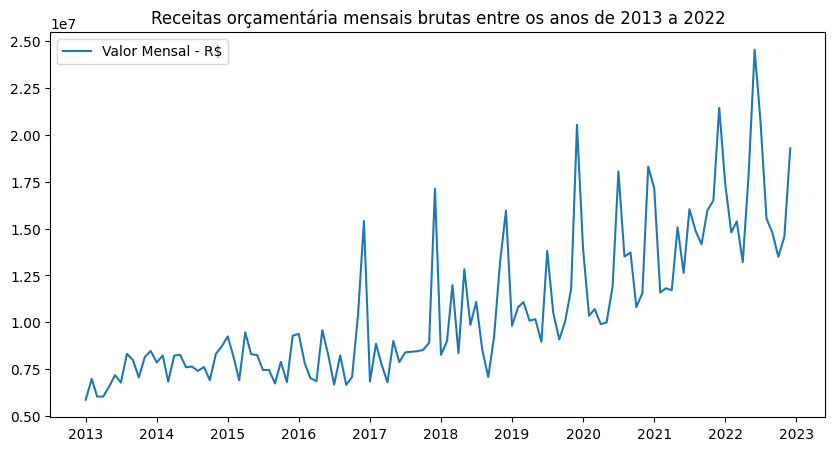

In [394]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_receitas_analise.index, df_receitas_analise['VALOR_ARRECADADO'], label='Valor Mensal - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Receitas orçamentária mensais brutas entre os anos de 2013 a 2022')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

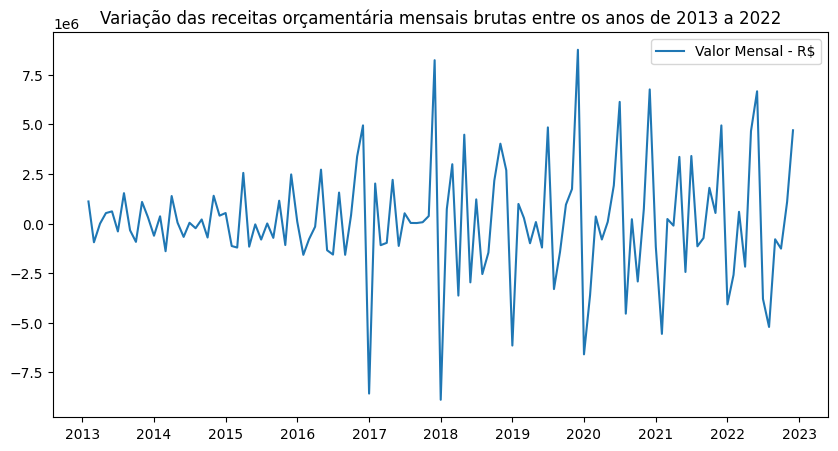

In [395]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_receitas_analise.index, df_receitas_analise['variacao_mensal'], label='Valor Mensal - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação das receitas orçamentária mensais brutas entre os anos de 2013 a 2022')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

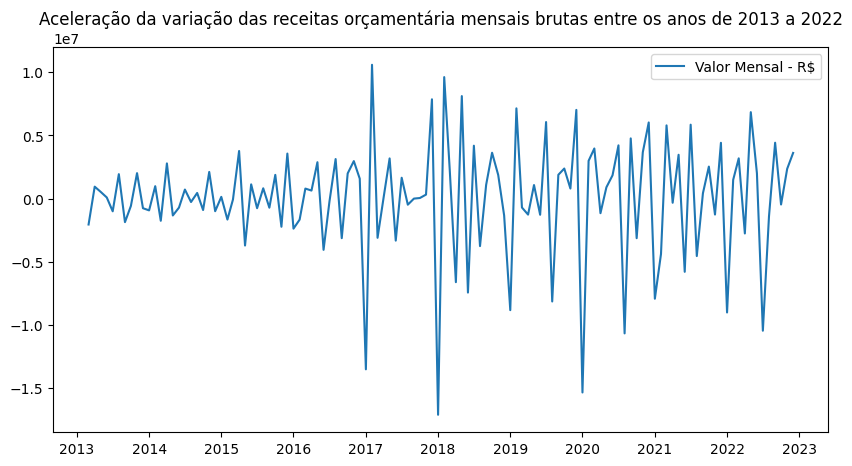

In [396]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_receitas_analise.index, df_receitas_analise['aceleracao_variacao_mensal'], label='Valor Mensal - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração da variação das receitas orçamentária mensais brutas entre os anos de 2013 a 2022')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

In [397]:
print(f"Total da variação das receitas mensais: R$ {df_receitas_analise['variacao_mensal'].sum().round(2)}")
print(f"Média móvel mensal da variação das receitas: R$ {(df_receitas_analise['variacao_mensal'].sum()/df_receitas_analise.shape[0]).round(2)}")

Total da variação das receitas mensais: R$ 13421972.82
Média móvel mensal da variação das receitas: R$ 111849.77


In [398]:
print(f"Total da aceleração da variação das receitas mensais: R$ {df_receitas_analise['aceleracao_variacao_mensal'].sum().round(2)}")
print(f"Média móvel mensal da aceleração da variação das receitas: R$ {(df_receitas_analise['aceleracao_variacao_mensal'].sum()/df_receitas_analise.shape[0]).round(2)}")

Total da aceleração da variação das receitas mensais: R$ 3586678.31
Média móvel mensal da aceleração da variação das receitas: R$ 29888.99


In [399]:
print(f"Porcentagem da variação das receitas mensais: {df_receitas_analise['porcentagem_variacao_mensal_%'].sum().round(2)}%")
print(f"Média movel percentual mensal da variação das receitas: {(df_receitas_analise['porcentagem_variacao_mensal_%'].sum()/df_receitas_analise.shape[0]).round(2)}%")

Porcentagem da variação das receitas mensais: 446.74%
Média movel percentual mensal da variação das receitas: 3.72%


In [400]:
print(f"Porcentagem da aceleração da variação das receitas mensais: {df_receitas_analise['porcentagem_aceleracao_variacao_mensal_%'].sum().round(2)}%")
print(f"Média móvel percentual mensal da acelereção variação das receitas: {(df_receitas_analise['porcentagem_aceleracao_variacao_mensal_%'].sum()/df_receitas_analise.shape[0]).round(2)}%")

Porcentagem da aceleração da variação das receitas mensais: -62985.94%
Média móvel percentual mensal da acelereção variação das receitas: -524.88%


#### Por ano

In [401]:
# criando df para analises dos dados
df_receitas_analise = df_receitas[['DATA','VALOR_ARRECADADO']]

# criando coluna mês-ano para agrupar os dados
df_receitas_analise['ano'] = pd.to_datetime(df_receitas_analise['DATA'].dt.strftime("%Y"))

# agrupando os dados no df e deletando coluna das datas
df_receitas_analise.drop(columns=('DATA'), inplace=True)
df_receitas_analise = df_receitas_analise.groupby('ano').sum().round(2)

# Mostrar os valores com 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format
print(df_receitas_analise)

            VALOR_ARRECADADO
ano                         
2013-01-01       85429787.25
2014-01-01       93620836.34
2015-01-01       95923044.11
2016-01-01      103399262.43
2017-01-01      106984059.44
2018-01-01      125478351.59
2019-01-01      136691716.11
2020-01-01      152785541.14
2021-01-01      179003057.61
2022-01-01      201644040.94


In [402]:
df_receitas_analise['variacao_anual'] = df_receitas_analise['VALOR_ARRECADADO'].diff()
df_receitas_analise['porcentagem_variacao_anual_%'] = ((df_receitas_analise['variacao_anual'] / df_receitas_analise['VALOR_ARRECADADO'].shift(1)) * 100).round(2)
df_receitas_analise['aceleracao_variacao_anual'] = df_receitas_analise['variacao_anual'].diff()
df_receitas_analise['porcentagem_aceleracao_variacao_anual_%'] = ((df_receitas_analise['aceleracao_variacao_anual'] / df_receitas_analise['variacao_anual'].shift(1)) * 100).round(2)
df_receitas_analise

,VALOR_ARRECADADO,variacao_anual,porcentagem_variacao_anual_%,aceleracao_variacao_anual,porcentagem_aceleracao_variacao_anual_%
ano,,,,,
2013-01-01,85429787.25,NaN,NaN,NaN,NaN
2014-01-01,93620836.34,8191049.09,9.59,NaN,NaN
2015-01-01,95923044.11,2302207.77,2.46,-5888841.32,-71.89
2016-01-01,103399262.43,7476218.32,7.79,5174010.55,224.74
2017-01-01,106984059.44,3584797.01,3.47,-3891421.31,-52.05
2018-01-01,125478351.59,18494292.15,17.29,14909495.14,415.91
2019-01-01,136691716.11,11213364.52,8.94,-7280927.63,-39.37
2020-01-01,152785541.14,16093825.03,11.77,4880460.51,43.52
2021-01-01,179003057.61,26217516.47,17.16,10123691.44,62.90


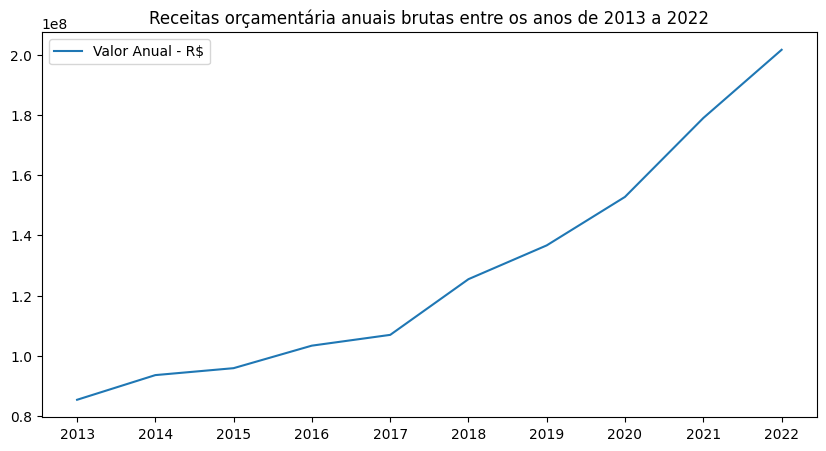

In [403]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_receitas_analise.index, df_receitas_analise['VALOR_ARRECADADO'], label='Valor Anual - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Receitas orçamentária anuais brutas entre os anos de 2013 a 2022')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

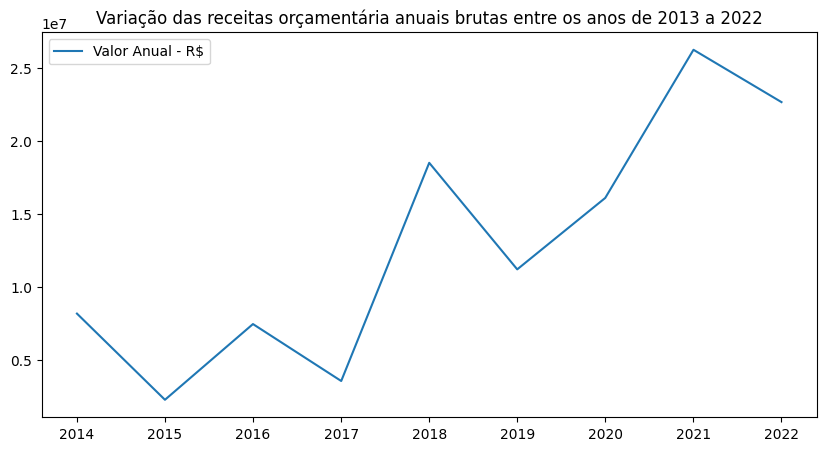

In [404]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_receitas_analise.index, df_receitas_analise['variacao_anual'], label='Valor Anual - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Variação das receitas orçamentária anuais brutas entre os anos de 2013 a 2022')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

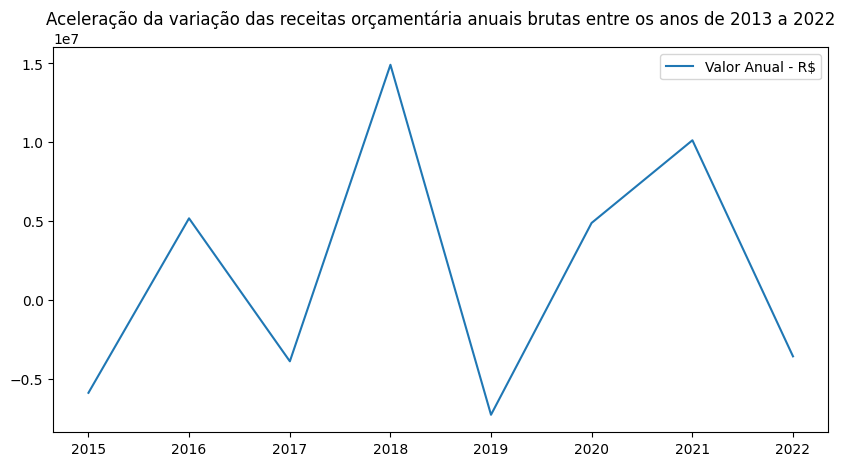

In [405]:
# Plota o gráfico de linha com as séries temporais
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df_receitas_analise.index, df_receitas_analise['aceleracao_variacao_anual'], label='Valor Anual - R$')

# Adiciona legenda e título ao gráfico
ax.legend()
ax.set_title('Aceleração da variação das receitas orçamentária anuais brutas entre os anos de 2013 a 2022')
ax.xaxis.label.set_visible(False)  # esconde a legenda do eixo X

# Configura o eixo x para não mostrar nenhum rótulo
# plt.gca().set_xticklabels([])

# Exibe o gráfico
plt.show()

In [406]:
print(f"Total da variação das receitas anuais: R$ {df_receitas_analise['variacao_anual'].sum().round(2)}")
print(f"Média móvel anual da variação das receitas: R$ {(df_receitas_analise['variacao_anual'].sum()/df_receitas_analise.shape[0]).round(2)}")

Total da variação das receitas anuais: R$ 116214253.69
Média móvel anual da variação das receitas: R$ 11621425.37


In [407]:
print(f"Total da aceleração da variação das receitas anuais: R$ {df_receitas_analise['aceleracao_variacao_anual'].sum().round(2)}")
print(f"Média móvel anual da aceleração da variação das receitas: R$ {(df_receitas_analise['aceleracao_variacao_anual'].sum()/df_receitas_analise.shape[0]).round(2)}")

Total da aceleração da variação das receitas anuais: R$ 14449934.24
Média móvel anual da aceleração da variação das receitas: R$ 1444993.42


In [408]:
print(f"Porcentagem da variação das receitas anuais: {df_receitas_analise['porcentagem_variacao_anual_%'].sum().round(2)}%")
print(f"Média movel percentual anual da variação das receitas: {(df_receitas_analise['porcentagem_variacao_anual_%'].sum()/df_receitas_analise.shape[0]).round(2)}%")

Porcentagem da variação das receitas anuais: 91.12%
Média movel percentual anual da variação das receitas: 9.11%


In [409]:
print(f"Porcentagem da aceleração da variação das receitas anuais: {df_receitas_analise['porcentagem_aceleracao_variacao_anual_%'].sum().round(2)}%")
print(f"Média móvel percentual anual da acelereção variação das receitas: {(df_receitas_analise['porcentagem_aceleracao_variacao_anual_%'].sum()/df_receitas_analise.shape[0]).round(2)}%")

Porcentagem da aceleração da variação das receitas anuais: 570.12%
Média móvel percentual anual da acelereção variação das receitas: 57.01%


## Análise regressiva linear

### Gerando dados para o PIB e População para os anos de 2021 e 2022

In [410]:
df_dados_analise_linear_receitas = df_receitas_analise.drop(columns=['variacao_anual','porcentagem_variacao_anual_%','aceleracao_variacao_anual','porcentagem_aceleracao_variacao_anual_%'])

df_dados_analise_linear_receitas = pd.merge(df_dados_analise_linear_receitas,
                                           df_ibge_populacao_index_ano.drop(columns=['variacao_anual','porcentagem_variacao_anual_%','aceleracao_variacao_anual','porcentagem_aceleracao_variacao_anual_%']),
                                           left_index=True, right_index=True, how='inner')

df_dados_analise_linear_receitas = pd.merge(df_dados_analise_linear_receitas,
                                           df_valor_pib_analise,
                                           left_index=True, right_index=True, how='inner')


df_dados_analise_linear_receitas['pib_percapita'] = ((df_dados_analise_linear_receitas['pib']/df_dados_analise_linear_receitas['populacao'])*100).round(2)

anos = pd.date_range(start='2013-01-01', end='2020-01-01', freq='AS')
df_dados_analise_linear_receitas['anos'] = anos.year

df_dados_analise_linear_receitas

,VALOR_ARRECADADO,populacao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss,pib_percapita,anos
ano,,,,,,,,,,,
2013-01-01,85429787.25,60612,770339457.00,10738138.00,662958077.00,10224894.00,63092932.00,37538383.00,214256422.00,1270935.55,2013
2014-01-01,93620836.34,61030,904648155.00,120932642.00,783715513.00,13255935.00,60162474.00,474787568.00,235509536.00,1482300.76,2014
2015-01-01,95923044.11,61431,949025262.00,117138144.00,831887119.00,13682117.00,74862041.00,493157692.00,250185268.00,1544863.77,2015
2016-01-01,103399262.43,61816,1039264140.00,144956681.00,894307459.00,15574357.00,70230326.00,553077111.00,255425665.00,1681221.92,2016
2017-01-01,106984059.44,62187,1096132930.00,155252578.00,940880352.00,16464405.00,79222556.00,560588617.00,284604775.00,1762639.99,2017
2018-01-01,125478351.59,61776,1064231522.00,139658974.00,924572548.00,15186338.00,86349617.00,53878259.00,284254002.00,1722726.50,2018
2019-01-01,136691716.11,61993,1128058014.00,146789776.00,981268239.00,13086111.00,100532921.00,571444581.00,296204626.00,1819653.85,2019
2020-01-01,152785541.14,62289,1055820.97,149580.22,984890.38,16844.65,98240.13,567634.70,302170.90,1695.04,2020


In [411]:
df_dados_analise_linear_receitas.dtypes

VALOR_ARRECADADO     float64
populacao              int64
pib                  float64
impostos_liquidos    float64
va                   float64
va_agropecuaria      float64
va_industria         float64
va_servicos          float64
va_adespss           float64
pib_percapita        float64
anos                   int64
dtype: object

In [412]:
print('Matriz de correlação entre as variáveis:')
df_dados_analise_linear_receitas.corr()

Matriz de correlação entre as variáveis:


,VALOR_ARRECADADO,populacao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss,pib_percapita,anos
VALOR_ARRECADADO,1.00,0.78,-0.47,-0.13,-0.46,-0.55,-0.33,-0.28,-0.48,-0.48,0.97
populacao,0.78,1.00,-0.15,0.28,-0.15,-0.15,-0.12,0.17,-0.19,-0.17,0.90
pib,-0.47,-0.15,1.00,0.85,1.00,0.97,0.96,0.64,1.00,1.00,-0.30
impostos_liquidos,-0.13,0.28,0.85,1.00,0.85,0.86,0.78,0.77,0.82,0.84,0.06
va,-0.46,-0.15,1.00,0.85,1.00,0.97,0.97,0.64,1.00,1.00,-0.30
va_agropecuaria,-0.55,-0.15,0.97,0.86,0.97,1.00,0.89,0.63,0.96,0.97,-0.37
va_industria,-0.33,-0.12,0.96,0.78,0.97,0.89,1.00,0.54,0.97,0.96,-0.19
va_servicos,-0.28,0.17,0.64,0.77,0.64,0.63,0.54,1.00,0.59,0.63,-0.12
va_adespss,-0.48,-0.19,1.00,0.82,1.00,0.96,0.97,0.59,1.00,1.00,-0.32
pib_percapita,-0.48,-0.17,1.00,0.84,1.00,0.97,0.96,0.63,1.00,1.00,-0.32


<Axes: >

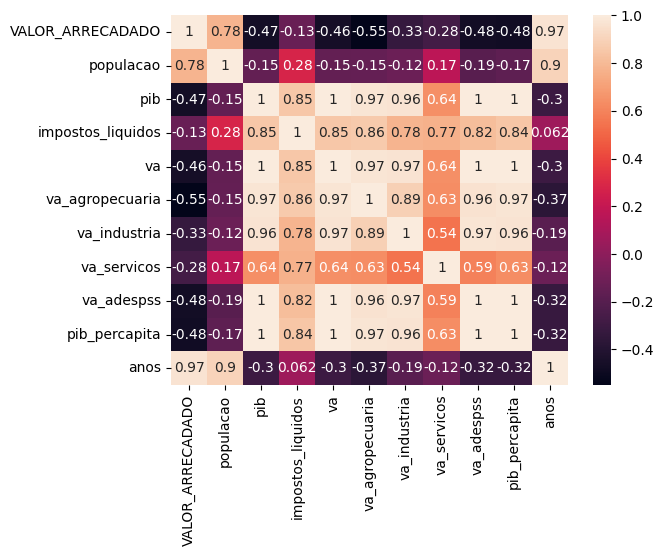

In [413]:
# plotando heatmap
sns.heatmap(df_dados_analise_linear_receitas.corr(), annot=True)

#### Análise regressiva linear

In [414]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

##### Modelo para análise regressiva linear com o ANO como variável dependente

In [415]:
df_receitas_analise

,VALOR_ARRECADADO,variacao_anual,porcentagem_variacao_anual_%,aceleracao_variacao_anual,porcentagem_aceleracao_variacao_anual_%
ano,,,,,
2013-01-01,85429787.25,NaN,NaN,NaN,NaN
2014-01-01,93620836.34,8191049.09,9.59,NaN,NaN
2015-01-01,95923044.11,2302207.77,2.46,-5888841.32,-71.89
2016-01-01,103399262.43,7476218.32,7.79,5174010.55,224.74
2017-01-01,106984059.44,3584797.01,3.47,-3891421.31,-52.05
2018-01-01,125478351.59,18494292.15,17.29,14909495.14,415.91
2019-01-01,136691716.11,11213364.52,8.94,-7280927.63,-39.37
2020-01-01,152785541.14,16093825.03,11.77,4880460.51,43.52
2021-01-01,179003057.61,26217516.47,17.16,10123691.44,62.90


In [416]:
# dados
X = df_dados_analise_linear_receitas[['anos']]
y = np.array(df_dados_analise_linear_receitas['VALOR_ARRECADADO']).reshape((-1,1))

# Divide o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# cria o modelo de regressão linear e ajusta os dados
model = LinearRegression().fit(X_train,y_train)

# utilizando o modelo para previsões nos dados de teste
y_pred = model.predict(X_test)

# calcula a previsão para um novo dado
ano = 2022
y_pred = model.predict([[ano]])

# Imprime os coeficientes da regressão
print(f'Coeficiente de interceptação: {model.intercept_[0]:.2f}')

# Avaliar o modelo usando os dados de teste
score = model.score(X_test, y_test)
print(f"A acurácia do modelo é {score:.2f}")

# Imprime a previsão para o novo dado
print(f'Previsão para o ano de {ano}: R$ {float(y_pred[0]):.2f}')

Coeficiente de interceptação: -23125661022.16
A acurácia do modelo é 0.47
Previsão para o ano de 2022: R$ 172158688.38


In [417]:
valor_arrecadado = 201644040.94
diferenca = valor_arrecadado - y_pred[0][0]
porcentagem = (diferenca/valor_arrecadado).round(2)
print(f'O modelo possui um desvio da realidade de aproximadamente: {porcentagem}%.')

O modelo possui um desvio da realidade de aproximadamente: 0.15%.


##### Modelo para análise regressiva linear com a POPULACAO como variável dependente

In [418]:
df_ibge_populacao

,ano,populacao
0,1991-01-01,51273
1,1992-01-01,51530
2,1993-01-01,51965
3,1994-01-01,52279
4,1995-01-01,52586
5,1996-01-01,51396
6,1997-01-01,51575
7,1998-01-01,51726
8,1999-01-01,51878
9,2000-01-01,54715


In [419]:
# dados
X = df_dados_analise_linear_receitas[['populacao']]
y = np.array(df_dados_analise_linear_receitas['VALOR_ARRECADADO']).reshape((-1,1))

# Divide o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# cria o modelo de regressão linear e ajusta os dados
model = LinearRegression().fit(X_train,y_train)

# utilizando o modelo para previsões nos dados de teste
y_pred = model.predict(X_test)

# calcula a previsão para um novo dado
populacao = 62576
y_pred = model.predict([[populacao]])

# Imprime os coeficientes da regressão
print(f'Coeficiente de interceptação: {model.intercept_[0]:.2f}')

# Avaliar o modelo usando os dados de teste
score = model.score(X_test, y_test)
print(f"A acurácia do modelo é {score:.2f}")

# Imprime a previsão para o novo dado
print(f'Previsão para a população de {populacao}: R$ {float(y_pred[0]):.2f}')

Coeficiente de interceptação: -3036952774.54
A acurácia do modelo é -1.04
Previsão para a população de 62576: R$ 151398941.57


In [420]:
valor_arrecadado = 179003057.61
diferenca = valor_arrecadado - y_pred[0][0]
porcentagem = (diferenca/valor_arrecadado).round(2)
print(f'O modelo possui um desvio da realidade de aproximadamente: {porcentagem}%.')

O modelo possui um desvio da realidade de aproximadamente: 0.15%.


##### Modelo para análise regressiva linear com a POPULACAO e ANO como variáveis dependentes

In [422]:
# dados
X = df_dados_analise_linear_receitas[['populacao','anos']]
y = np.array(df_dados_analise_linear_receitas['VALOR_ARRECADADO']).reshape((-1,1))

# Divide o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# cria o modelo de regressão linear e ajusta os dados
model = LinearRegression().fit(X_train,y_train)

# utilizando o modelo para previsões nos dados de teste
y_pred = model.predict(X_test)

# calcula a previsão para um novo dado
populacao = 62576
ano = 2021
y_pred = model.predict([[populacao,ano]])

# Imprime os coeficientes da regressão
print(f'Coeficiente de interceptação: {model.intercept_[0]:.2f}')

# Avaliar o modelo usando os dados de teste
score = model.score(X_test, y_test)
print(f"A acurácia do modelo é {score:.2f}")

# Imprime a previsão para o novo dado
print(f'Previsão para a população de {populacao} no ano de {ano}: R$ {float(y_pred[0]):.2f}')

Coeficiente de interceptação: -27016999389.72
A acurácia do modelo é 0.93
Previsão para a população de 62576 no ano de 2021: R$ 157738287.10


In [425]:
valor_arrecadado = 179003057.61
diferenca = valor_arrecadado - y_pred[0][0]
porcentagem = (diferenca/valor_arrecadado).round(2)
print(f'O modelo possui um desvio da realidade de aproximadamente: {porcentagem}%.')

O modelo possui um desvio da realidade de aproximadamente: 0.12%.
